Download and Import all the neccessary packages


In [ ]:
pip install shap

     |████████████████████████████████| 564 kB 8.0 MB/s 


In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline
import time
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sklearn
from sklearn import datasets
from urllib.error import URLError
import pickle
from pathlib import Path
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications.xception import Xception 
import tensorflow as tf
from sklearn.inspection import permutation_importance
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import pandas
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import shap
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from shap.plots import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


Mounted google drive and take the fifa dataset

In [ ]:
dataset_path = '/content/drive/MyDrive/FYPDataset'
dataset_filename = '/footballData.csv'

In [ ]:
dataframe = pd.read_csv(dataset_path + dataset_filename)
#Drop the unnecessary columns which do not contribute to the player's value
dataframe.drop(['real_face','player_tags','sofifa_id','player_url','long_name','dob','league_name','international_reputation','nationality','player_tags','loaned_from','team_jersey_number','joined','nation_position','international_reputation','nation_jersey_number','body_type','player_traits','lwb','rcm','cm','rdm','lb','rwb', 'rw','lm','lw', 'lcm', 'lcb','cb', 'rcb', 'rm','st','cf','lf','rf','lam','cam', 'ram','ls','rs', 'rb', 'ldm', 'cdm','team_position','gk_diving','gk_handling','gk_reflexes','gk_positioning','gk_kicking'], axis=1, inplace=True)

In [ ]:
print(dataframe.columns)

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'club_name',
       'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'weak_foot', 'skill_moves',
       'work_rate', 'release_clause_eur', 'contract_valid_until', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_speed',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure',

Preview of the dataframe

In [ ]:
dataframe.head()

short_name  age  height_cm  weight_kg            club_name  \
0           L. Messi   33        170         72         FC Barcelona   
1  Cristiano Ronaldo   35        187         83             Juventus   
2           J. Oblak   27        188         87      Atlético Madrid   
3     R. Lewandowski   31        184         80    FC Bayern München   
4          Neymar Jr   28        175         68  Paris Saint-Germain   

   league_rank  overall  potential  value_eur  wage_eur  ...  \
0          1.0       93         93   67500000    560000  ...   
1          1.0       92         92   46000000    220000  ...   
2          1.0       91         93   75000000    125000  ...   
3          1.0       91         91   80000000    240000  ...   
4          1.0       91         91   90000000    270000  ...   

  mentality_penalties mentality_composure  defending_marking  \
0                  75                  96                NaN   
1                  84                  95                NaN   
2                  11                  68                NaN   
3                  88                  88                NaN   
4                  92                  93                NaN   

   defending_standing_tackle defending_sliding_tackle  goalkeeping_diving  \
0                         35                       24                   6   
1                         32                       24                   7   
2                         12                       18                  87   
3                         42                       19                  15   
4                         30                       29                   9   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                    11                   15                       14   
1                    11                   15                       14   
2                    92                   78                       90   
3                     6                   12                        8   
4                     9                   15                       15   

   goalkeeping_reflexes  
0                     8  
1                    11  
2                    90  
3                    10  
4                    11  

[5 rows x 58 columns]

In [ ]:
dataframe[dataframe['league_rank'] == 1]

short_name  age  height_cm  weight_kg  \
0               L. Messi   33        170         72   
1      Cristiano Ronaldo   35        187         83   
2               J. Oblak   27        188         87   
3         R. Lewandowski   31        184         80   
4              Neymar Jr   28        175         68   
...                  ...  ...        ...        ...   
18939          K. Angulo   24        176         73   
18940     Zhang Mengxuan   21        177         70   
18941      Wang Zhenghao   20        185         74   
18942        Chen Zitong   23        186         80   
18943           Song Yue   28        185         79   

                                 club_name  league_rank  overall  potential  \
0                             FC Barcelona          1.0       93         93   
1                                 Juventus          1.0       92         92   
2                          Atlético Madrid          1.0       91         93   
3                        FC Bayern München          1.0       91         91   
4                      Paris Saint-Germain          1.0       91         91   
...                                    ...          ...      ...        ...   
18939                      América de Cali          1.0       47         52   
18940  Chongqing Dangdai Lifan FC SWM Team          1.0       47         52   
18941                      Tianjin TEDA FC          1.0       47         51   
18942        Shijiazhuang Ever Bright F.C.          1.0       47         51   
18943                      Tianjin TEDA FC          1.0       47         47   

       value_eur  wage_eur  ... mentality_penalties mentality_composure  \
0       67500000    560000  ...                  75                  96   
1       46000000    220000  ...                  84                  95   
2       75000000    125000  ...                  11                  68   
3       80000000    240000  ...                  88                  88   
4       90000000    270000  ...                  92                  93   
...          ...       ...  ...                 ...                 ...   
18939      40000       500  ...                  39                  36   
18940      35000      1000  ...                  35                  40   
18941      35000      1000  ...                  35                  40   
18942      40000      1000  ...                  42                  43   
18943      30000      2000  ...                  36                  35   

       defending_marking  defending_standing_tackle defending_sliding_tackle  \
0                    NaN                         35                       24   
1                    NaN                         32                       24   
2                    NaN                         12                       18   
3                    NaN                         42                       19   
4                    NaN                         30                       29   
...                  ...                        ...                      ...   
18939                NaN                         39                       54   
18940                NaN                         56                       47   
18941                NaN                         55                       45   
18942                NaN                         49                       45   
18943                NaN                         43                       45   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                       6                    11                   15   
1                       7                    11                   15   
2                      87                    92                   78   
3                      15                     6                   12   
4                       9                     9                   15   
...                   ...                   ...                  ...   
18939                  10             

In [ ]:
dataframe.shape

(18944, 58)

Dataset cleaning remove irrelevant columns


In [ ]:
dataframe.dropna(subset = ['player_positions', 'value_eur'], inplace=True) 


In [ ]:
'''
FUNCTION: CheckForNaNsInColumn

INPUT: 
dataframe holding all of the information for the football players
column_name = the column that the null values will be checked again

OUTPUT: does not return anything prints the total of null values within a column


'''

def checkForNaNsInColumn(dataframe, column_name):
  print(column_name)
  print(dataframe[column_name].isnull().sum())
  

In [ ]:
dataframe.isnull().sum().sum()

49973

In [ ]:
dataframe.columns

#print(len(dataframe.columns))

print(dataframe.columns)

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'club_name',
       'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'weak_foot', 'skill_moves',
       'work_rate', 'release_clause_eur', 'contract_valid_until', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_speed',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure',

To check the number of Nans in all the columns found in the dataset

In [ ]:
for column in dataframe.columns:
  checkForNaNsInColumn(dataframe,column)

short_name
0
age
0
height_cm
0
weight_kg
0
club_name
225
league_rank
225
overall
0
potential
0
value_eur
0
wage_eur
0
player_positions
0
preferred_foot
0
weak_foot
0
skill_moves
0
work_rate
0
release_clause_eur
995
contract_valid_until
225
pace
2083
shooting
2083
passing
2083
dribbling
2083
defending
2083
physic
2083
gk_speed
16861
attacking_crossing
0
attacking_finishing
0
attacking_heading_accuracy
0
attacking_short_passing
0
attacking_volleys
0
skill_dribbling
0
skill_curve
0
skill_fk_accuracy
0
skill_long_passing
0
skill_ball_control
0
movement_acceleration
0
movement_sprint_speed
0
movement_agility
0
movement_reactions
0
movement_balance
0
power_shot_power
0
power_jumping
0
power_stamina
0
power_strength
0
power_long_shots
0
mentality_aggression
0
mentality_interceptions
0
mentality_positioning
0
mentality_vision
0
mentality_penalties
0
mentality_composure
0
defending_marking
18944
defending_standing_tackle
0
defending_sliding_tackle
0
goalkeeping_diving
0
goalkeeping_handling
0
g

Release Clause Eur handles the release clause for the player, for those with a  NAN I will be handling the data by introducing a 0 to the release clause as a release clause is team's self imposed valuation for a player and may prove to be a valuable feature and of high importance for the valuation


In [ ]:
dataframe['release_clause_eur'].fillna(0, inplace=True)

In [ ]:
checkForNaNsInColumn(dataframe, 'release_clause_eur')

release_clause_eur
0


In [ ]:
dataframe.league_rank.unique()

array([ 1., nan,  2.,  3.,  4.])

In [ ]:
dataframe[dataframe['league_rank'].isna()]

short_name  age  height_cm  weight_kg club_name  league_rank  \
359    Juiano Mestres   24        181         82       NaN          NaN   
363    Welington Dano   20        178         69       NaN          NaN   
494      J. Serendero   32        190         85       NaN          NaN   
495       J. Frendado   36        181         82       NaN          NaN   
496        M. Baldona   36        177         75       NaN          NaN   
...               ...  ...        ...        ...       ...          ...   
16612    R. Jayaraman   35        180         82       NaN          NaN   
16663      S. Rabotov   18        177         66       NaN          NaN   
17061        O. Patla   27        167         69       NaN          NaN   
17085        C. Palan   29        181         69       NaN          NaN   
17086      D. Singhal   35        177         71       NaN          NaN   

       overall  potential  value_eur  wage_eur  ... mentality_penalties  \
359         81         81          0         0  ...                  62   
363         81         81          0         0  ...                  61   
494         80         80          0         0  ...                  14   
495         80         80          0         0  ...                  62   
496         80         80          0         0  ...                  61   
...        ...        ...        ...       ...  ...                 ...   
16612       58         58          0         0  ...                  65   
16663       57         75          0         0  ...                  41   
17061       57         58          0         0  ...                  49   
17085       57         57          0         0  ...                  47   
17086       57         57          0         0  ...                  38   

      mentality_composure  defending_marking  defending_standing_tackle  \
359                    70                NaN                         85   
363                    82                NaN                         77   
494                    67                NaN                         17   
495                    70                NaN                         82   
496                    68                NaN                         81   
...                   ...                ...                        ...   
16612                  47                NaN                         38   
16663                  56                NaN                         58   
17061                  58                NaN                         54   
17085                  60                NaN                         57   
17086                  61                NaN                         59   

      defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
359                         84                  18                    12   
363                         81                  16                    15   
494                         13                  78                    81   
495                         82                  14                    15   
496                         77                   9                     9   
...                        ...                 ...                   ...   
16612                       15                  15                    12   
16663                       58                  15                    12   
17061                       47                  14                    11   
17085                       62                  13                    11   
17086                       55                   9                    15   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
359                     14                       11                    18  
363                     15                        7                     7  
494                     77                       80                    77  
495                     15                       17                    19  
496            

Go through multiple players with league rankings of NAN which could suggest they are less well known leagues hence it is appropriate to assign them a new league rank to 5 from the current 1,2,3,4

In [ ]:
dataframe['league_rank'].fillna(5, inplace=True)

To predict the value of a football player, it is better to have some price information on the football players and it is not possible for a player to have a value of 0 hence it is required to remove the pricing information

In [ ]:
dataframe.drop(dataframe.index[dataframe['value_eur'] == 0], inplace=True)

In [ ]:
dataframe.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'club_name',
       'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'weak_foot', 'skill_moves',
       'work_rate', 'release_clause_eur', 'contract_valid_until', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_speed',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure',

The contract valid until impacts a player price as the players' contract comes to an end on the 

In [ ]:
dataframe.dropna(subset = ['club_name', 'contract_valid_until'], inplace=True) 


In [ ]:
dataframe.sort_values(by=['value_eur'], ascending = False)

short_name  age  height_cm  weight_kg            club_name  \
6             K. Mbappé   21        178         73  Paris Saint-Germain   
4             Neymar Jr   28        175         68  Paris Saint-Germain   
5          K. De Bruyne   29        181         70      Manchester City   
3        R. Lewandowski   31        184         80    FC Bayern München   
11             M. Salah   28        175         71            Liverpool   
...                 ...  ...        ...        ...                  ...   
15998        S. Russell   37        183         70         Grimsby Town   
16584    F. Al Shammari   39        181         75             Al Fayha   
17066  K. Stamatopoulos   40        188         80                  AIK   
17794        Sun Shoubo   37        192         80           Wuhan Zall   
18508          G. Maley   37        188         90        Livingston FC   

       league_rank  overall  potential  value_eur  wage_eur  ...  \
6              1.0       90         95  105500000    160000  ...   
4              1.0       91         91   90000000    270000  ...   
5              1.0       91         91   87000000    370000  ...   
3              1.0       91         91   80000000    240000  ...   
11             1.0       90         90   78000000    250000  ...   
...            ...      ...        ...        ...       ...  ...   
15998          4.0       59         59      15000       850  ...   
16584          1.0       58         58      15000      2000  ...   
17066          1.0       57         57      10000       600  ...   
17794          1.0       55         55       8000       900  ...   
18508          1.0       52         52       5000       600  ...   

      mentality_penalties mentality_composure  defending_marking  \
6                      70                  84                NaN   
4                      92                  93                NaN   
5                      84                  91                NaN   
3                      88                  88                NaN   
11                     83                  90                NaN   
...                   ...                 ...                ...   
15998                  14                  57                NaN   
16584                  22                  47                NaN   
17066                  16                  44                NaN   
17794                  27                  36                NaN   
18508                  12                  37                NaN   

       defending_standing_tackle defending_sliding_tackle  goalkeeping_diving  \
6                             34                       32                  13   
4                             30                       29                   9   
5                             65                       53                  15   
3                             42                       19                  15   
11                            43                       41                  14   
...                          ...                      ...                 ...   
15998                         22                       23                  56   
16584                         13                       13                  58   
17066                          9                       10                  57   
17794                         22                       13                  52   
18508                         14                       10                  48   

       goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
6                         5                    7                       11   
4                         9                   15                       15   
5                        13                    5                       10   
3                         6                   12                        8   
11                       14                    9                       11   
...                     ...                

KNN would be great impacted by outliers hence it is necessary to explore the data prior to identify what else may need to be removed etc

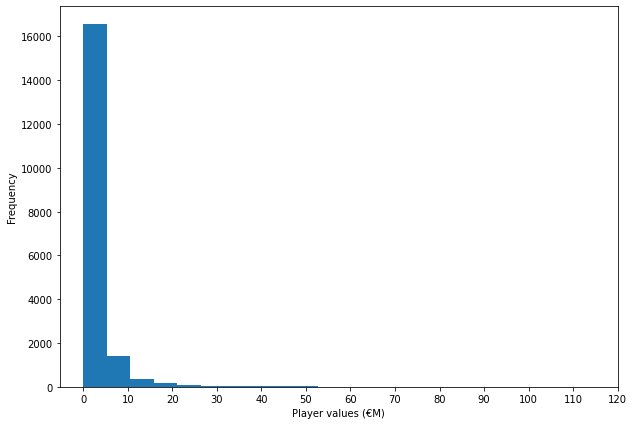

In [ ]:
#Plot frequency of player value ranges in €5 million intervals
fig = plt.figure(figsize = (10,7))
#Use 20 bins of player values. Value divided by 10^6 so x-axis units are in millions
(dataframe['value_eur']/10**6).plot.hist(bins = 20)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.xticks(np.arange(0,125,10))
plt.xlabel('Player values (€M)')
plt.show()

I plotted the boxplot and the lower and upper quartiles to be able to identify the outliers in the data

In [ ]:
lower_quartile = dataframe['value_eur'].quantile(0.25)
upper_quartile = dataframe['value_eur'].quantile(0.75)

upper_outlier = dataframe['value_eur'] <= upper_quartile + 1.5*(upper_quartile-lower_quartile)
lower_outlier = dataframe['value_eur'] >= lower_quartile - 1.5*(upper_quartile-lower_quartile)

In [ ]:
upper_quartile

1800000.0

In [ ]:
lower_quartile

300000.0

In [ ]:
print(upper_outlier)

0        False
1        False
2        False
3        False
4        False
         ...  
18939     True
18940     True
18941     True
18942     True
18943     True
Name: value_eur, Length: 18707, dtype: bool


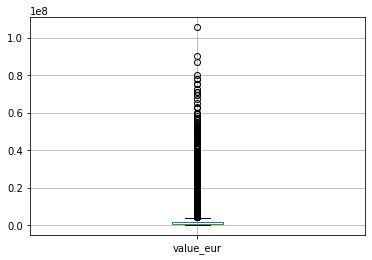

In [ ]:
boxplot = dataframe.boxplot(column=['value_eur']) 

In [ ]:
dataframe.loc[upper_outlier]

short_name  age  height_cm  weight_kg  \
239         G. Buffon   42        192         92   
317              Pepe   37        188         81   
447       B. Ivanović   36        185         91   
593        Pepe Reina   37        188         92   
595     J. Mascherano   36        174         73   
...               ...  ...        ...        ...   
18939       K. Angulo   24        176         73   
18940  Zhang Mengxuan   21        177         70   
18941   Wang Zhenghao   20        185         74   
18942     Chen Zitong   23        186         80   
18943        Song Yue   28        185         79   

                                 club_name  league_rank  overall  potential  \
239                               Juventus          1.0       82         82   
317                               FC Porto          1.0       81         81   
447                   West Bromwich Albion          1.0       80         80   
593                                  Lazio          1.0       79         79   
595                Estudiantes de La Plata          1.0       79         79   
...                                    ...          ...      ...        ...   
18939                      América de Cali          1.0       47         52   
18940  Chongqing Dangdai Lifan FC SWM Team          1.0       47         52   
18941                      Tianjin TEDA FC          1.0       47         51   
18942        Shijiazhuang Ever Bright F.C.          1.0       47         51   
18943                      Tianjin TEDA FC          1.0       47         47   

       value_eur  wage_eur  ... mentality_penalties mentality_composure  \
239      2200000     41000  ...                  22                  70   
317      3600000     13000  ...                  57                  79   
447      3000000     61000  ...                  58                  81   
593      1300000     30000  ...                  24                  64   
595      2700000     15000  ...                  60                  81   
...          ...       ...  ...                 ...                 ...   
18939      40000       500  ...                  39                  36   
18940      35000      1000  ...                  35                  40   
18941      35000      1000  ...                  35                  40   
18942      40000      1000  ...                  42                  43   
18943      30000      2000  ...                  36                  35   

       defending_marking  defending_standing_tackle defending_sliding_tackle  \
239                  NaN                         11                       11   
317                  NaN                         83                       82   
447                  NaN                         82                       82   
593                  NaN                         22                       24   
595                  NaN                         81                       80   
...                  ...                        ...                      ...   
18939                NaN                         39                       54   
18940                NaN                         56                       47   
18941                NaN                         55                       45   
18942                NaN                         49                       45   
18943                NaN                         43                       45   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
239                    77                    76                   74   
317                     8                    15                    5   
447                    15                     9                   13   
593                    77                    79                   80   
595                     6                    10                    8   
...                   ...                   ...                  ...   
18939                  10                     9                   14   

In [ ]:
dataframe.loc[upper_outlier].sort_values(by=['value_eur'], ascending = False)

short_name  age  height_cm  weight_kg              club_name  \
2983        G. Carrillo   29        191         87            Southampton   
2709          A. Wakaso   28        178         82      Vitória Guimarães   
2959      A. Voglsammer   28        178         81  DSC Arminia Bielefeld   
3825         K. Jóźwiak   22        176         70           Derby County   
3008    Lúcio Calegario   28        169         69              São Paulo   
...                 ...  ...        ...        ...                    ...   
15999         M. Gurski   41        189         89     SpVgg Unterhaching   
16584    F. Al Shammari   39        181         75               Al Fayha   
17066  K. Stamatopoulos   40        188         80                    AIK   
17794        Sun Shoubo   37        192         80             Wuhan Zall   
18508          G. Maley   37        188         90          Livingston FC   

       league_rank  overall  potential  value_eur  wage_eur  ...  \
2983           1.0       73         73    4000000     44000  ...   
2709           1.0       73         74    4000000      9000  ...   
2959           1.0       73         73    4000000     22000  ...   
3825           2.0       71         82    4000000     16000  ...   
3008           1.0       73         73    4000000       500  ...   
...            ...      ...        ...        ...       ...  ...   
15999          3.0       59         59      15000       550  ...   
16584          1.0       58         58      15000      2000  ...   
17066          1.0       57         57      10000       600  ...   
17794          1.0       55         55       8000       900  ...   
18508          1.0       52         52       5000       600  ...   

      mentality_penalties mentality_composure  defending_marking  \
2983                   75                  70                NaN   
2709                   36                  68                NaN   
2959                   69                  69                NaN   
3825                   52                  61                NaN   
3008                   65                  67                NaN   
...                   ...                 ...                ...   
15999                  12                  50                NaN   
16584                  22                  47                NaN   
17066                  16                  44                NaN   
17794                  27                  36                NaN   
18508                  12                  37                NaN   

       defending_standing_tackle defending_sliding_tackle  goalkeeping_diving  \
2983                          29                       26                  10   
2709                          76                       75                  15   
2959                          34                       23                  12   
3825                          44                       35                  10   
3008                          70                       68                   9   
...                          ...                      ...                 ...   
15999                         11                       12                  53   
16584                         13                       13                  58   
17066                          9                       10                  57   
17794                         22                       13                  52   
18508                         14                       10                  48   

       goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
2983                     11                    6                        9   
2709                     12                   12                       12   
2959                      9                    7                       14   
3825                     14                    8                        9   
3008                     15                   11                       13   
...                

In [ ]:
dataframe.loc[lower_outlier]

short_name  age  height_cm  weight_kg  \
0               L. Messi   33        170         72   
1      Cristiano Ronaldo   35        187         83   
2               J. Oblak   27        188         87   
3         R. Lewandowski   31        184         80   
4              Neymar Jr   28        175         68   
...                  ...  ...        ...        ...   
18939          K. Angulo   24        176         73   
18940     Zhang Mengxuan   21        177         70   
18941      Wang Zhenghao   20        185         74   
18942        Chen Zitong   23        186         80   
18943           Song Yue   28        185         79   

                                 club_name  league_rank  overall  potential  \
0                             FC Barcelona          1.0       93         93   
1                                 Juventus          1.0       92         92   
2                          Atlético Madrid          1.0       91         93   
3                        FC Bayern München          1.0       91         91   
4                      Paris Saint-Germain          1.0       91         91   
...                                    ...          ...      ...        ...   
18939                      América de Cali          1.0       47         52   
18940  Chongqing Dangdai Lifan FC SWM Team          1.0       47         52   
18941                      Tianjin TEDA FC          1.0       47         51   
18942        Shijiazhuang Ever Bright F.C.          1.0       47         51   
18943                      Tianjin TEDA FC          1.0       47         47   

       value_eur  wage_eur  ... mentality_penalties mentality_composure  \
0       67500000    560000  ...                  75                  96   
1       46000000    220000  ...                  84                  95   
2       75000000    125000  ...                  11                  68   
3       80000000    240000  ...                  88                  88   
4       90000000    270000  ...                  92                  93   
...          ...       ...  ...                 ...                 ...   
18939      40000       500  ...                  39                  36   
18940      35000      1000  ...                  35                  40   
18941      35000      1000  ...                  35                  40   
18942      40000      1000  ...                  42                  43   
18943      30000      2000  ...                  36                  35   

       defending_marking  defending_standing_tackle defending_sliding_tackle  \
0                    NaN                         35                       24   
1                    NaN                         32                       24   
2                    NaN                         12                       18   
3                    NaN                         42                       19   
4                    NaN                         30                       29   
...                  ...                        ...                      ...   
18939                NaN                         39                       54   
18940                NaN                         56                       47   
18941                NaN                         55                       45   
18942                NaN                         49                       45   
18943                NaN                         43                       45   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                       6                    11                   15   
1                       7                    11                   15   
2                      87                    92                   78   
3                      15                     6                   12   
4                       9                     9                   15   
...                   ...                   ...                  ...   
18939                  10             

A list of the data types in the dataframe 

In [ ]:
dataframe.dtypes

short_name                     object
age                             int64
height_cm                       int64
weight_kg                       int64
club_name                      object
league_rank                   float64
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
weak_foot                       int64
skill_moves                     int64
work_rate                      object
release_clause_eur            float64
contract_valid_until          float64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
gk_speed                      float64
attacking_crossing              int64
attacking_finishing             int64
attacking_he

Dataframe info is used to determine the values which are not null

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18707 entries, 0 to 18943
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18707 non-null  object 
 1   age                         18707 non-null  int64  
 2   height_cm                   18707 non-null  int64  
 3   weight_kg                   18707 non-null  int64  
 4   club_name                   18707 non-null  object 
 5   league_rank                 18707 non-null  float64
 6   overall                     18707 non-null  int64  
 7   potential                   18707 non-null  int64  
 8   value_eur                   18707 non-null  int64  
 9   wage_eur                    18707 non-null  int64  
 10  player_positions            18707 non-null  object 
 11  preferred_foot              18707 non-null  object 
 12  weak_foot                   18707 non-null  int64  
 13  skill_moves                 187

Cleaning not done remove defending_marking all values are null



In [ ]:
dataframe.drop(columns = ['defending_marking'], inplace=True) 

In [ ]:
dataframe

short_name  age  height_cm  weight_kg  \
0               L. Messi   33        170         72   
1      Cristiano Ronaldo   35        187         83   
2               J. Oblak   27        188         87   
3         R. Lewandowski   31        184         80   
4              Neymar Jr   28        175         68   
...                  ...  ...        ...        ...   
18939          K. Angulo   24        176         73   
18940     Zhang Mengxuan   21        177         70   
18941      Wang Zhenghao   20        185         74   
18942        Chen Zitong   23        186         80   
18943           Song Yue   28        185         79   

                                 club_name  league_rank  overall  potential  \
0                             FC Barcelona          1.0       93         93   
1                                 Juventus          1.0       92         92   
2                          Atlético Madrid          1.0       91         93   
3                        FC Bayern München          1.0       91         91   
4                      Paris Saint-Germain          1.0       91         91   
...                                    ...          ...      ...        ...   
18939                      América de Cali          1.0       47         52   
18940  Chongqing Dangdai Lifan FC SWM Team          1.0       47         52   
18941                      Tianjin TEDA FC          1.0       47         51   
18942        Shijiazhuang Ever Bright F.C.          1.0       47         51   
18943                      Tianjin TEDA FC          1.0       47         47   

       value_eur  wage_eur  ... mentality_vision mentality_penalties  \
0       67500000    560000  ...               95                  75   
1       46000000    220000  ...               82                  84   
2       75000000    125000  ...               65                  11   
3       80000000    240000  ...               79                  88   
4       90000000    270000  ...               90                  92   
...          ...       ...  ...              ...                 ...   
18939      40000       500  ...               49                  39   
18940      35000      1000  ...               25                  35   
18941      35000      1000  ...               25                  35   
18942      40000      1000  ...               45                  42   
18943      30000      2000  ...               44                  36   

       mentality_composure  defending_standing_tackle  \
0                       96                         35   
1                       95                         32   
2                       68                         12   
3                       88                         42   
4                       93                         30   
...                    ...                        ...   
18939                   36                         39   
18940                   40                         56   
18941                   40                         55   
18942                   43                         49   
18943                   35                         43   

      defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                           24                   6                    11   
1                           24                   7                    11   
2                           18                  87                    92   
3                           19                  15                     6   
4                           29                   9                     9   
...                        ...                 ...                   ...   
18939                       54                  10                     9   
18940                       47                  12                    13   
18941                       45                  12                     9   
18942                       45                  15                     7   
18943             

Attacking work rate is mapped to 0 and high defensive work rate is 1

In [ ]:
dataframe['attacking_work_rate'] = dataframe['work_rate'].map(lambda x: x.split('/')[0])
dataframe['defensive_work_rate'] = dataframe['work_rate'].map(lambda x: x.split('/')[1])


In [ ]:
dataframe

short_name  age  height_cm  weight_kg  \
0               L. Messi   33        170         72   
1      Cristiano Ronaldo   35        187         83   
2               J. Oblak   27        188         87   
3         R. Lewandowski   31        184         80   
4              Neymar Jr   28        175         68   
...                  ...  ...        ...        ...   
18939          K. Angulo   24        176         73   
18940     Zhang Mengxuan   21        177         70   
18941      Wang Zhenghao   20        185         74   
18942        Chen Zitong   23        186         80   
18943           Song Yue   28        185         79   

                                 club_name  league_rank  overall  potential  \
0                             FC Barcelona          1.0       93         93   
1                                 Juventus          1.0       92         92   
2                          Atlético Madrid          1.0       91         93   
3                        FC Bayern München          1.0       91         91   
4                      Paris Saint-Germain          1.0       91         91   
...                                    ...          ...      ...        ...   
18939                      América de Cali          1.0       47         52   
18940  Chongqing Dangdai Lifan FC SWM Team          1.0       47         52   
18941                      Tianjin TEDA FC          1.0       47         51   
18942        Shijiazhuang Ever Bright F.C.          1.0       47         51   
18943                      Tianjin TEDA FC          1.0       47         47   

       value_eur  wage_eur  ... mentality_composure defending_standing_tackle  \
0       67500000    560000  ...                  96                        35   
1       46000000    220000  ...                  95                        32   
2       75000000    125000  ...                  68                        12   
3       80000000    240000  ...                  88                        42   
4       90000000    270000  ...                  93                        30   
...          ...       ...  ...                 ...                       ...   
18939      40000       500  ...                  36                        39   
18940      35000      1000  ...                  40                        56   
18941      35000      1000  ...                  40                        55   
18942      40000      1000  ...                  43                        49   
18943      30000      2000  ...                  35                        43   

       defending_sliding_tackle  goalkeeping_diving goalkeeping_handling  \
0                            24                   6                   11   
1                            24                   7                   11   
2                            18                  87                   92   
3                            19                  15                    6   
4                            29                   9                    9   
...                         ...                 ...                  ...   
18939                        54                  10                    9   
18940                        47                  12                   13   
18941                        45                  12                    9   
18942                        45                  15                    7   
18943                        45                   8                    5   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
0                       15                       14                     8   
1                       15                       14                    11   
2                       78                       90                    90   
3                       12                        8                    10   
4                       15                       15                    11   
...                    ...                      ...     

In [ ]:
dataframe.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'club_name',
       'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'weak_foot', 'skill_moves',
       'work_rate', 'release_clause_eur', 'contract_valid_until', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_speed',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure',

In [ ]:
dataframe.drop(columns = ['work_rate'], inplace=True) 

In Fifa the players have a workrate is of the following 3, Low Medium and High and that's denoted as 1, 2 and 3. Hence for the defensive and attacking work rate with the Low, Medium and High 1,2,3

In [ ]:
cleanup_work_rates = {"attacking_work_rate":     {"Low": 1, "Medium": 2, "High": 3},
                "defensive_work_rate": {"Low": 1, "Medium": 2, "High": 3}}

In [ ]:
dataframe = dataframe.replace(cleanup_work_rates)
dataframe

short_name  age  height_cm  weight_kg  \
0               L. Messi   33        170         72   
1      Cristiano Ronaldo   35        187         83   
2               J. Oblak   27        188         87   
3         R. Lewandowski   31        184         80   
4              Neymar Jr   28        175         68   
...                  ...  ...        ...        ...   
18939          K. Angulo   24        176         73   
18940     Zhang Mengxuan   21        177         70   
18941      Wang Zhenghao   20        185         74   
18942        Chen Zitong   23        186         80   
18943           Song Yue   28        185         79   

                                 club_name  league_rank  overall  potential  \
0                             FC Barcelona          1.0       93         93   
1                                 Juventus          1.0       92         92   
2                          Atlético Madrid          1.0       91         93   
3                        FC Bayern München          1.0       91         91   
4                      Paris Saint-Germain          1.0       91         91   
...                                    ...          ...      ...        ...   
18939                      América de Cali          1.0       47         52   
18940  Chongqing Dangdai Lifan FC SWM Team          1.0       47         52   
18941                      Tianjin TEDA FC          1.0       47         51   
18942        Shijiazhuang Ever Bright F.C.          1.0       47         51   
18943                      Tianjin TEDA FC          1.0       47         47   

       value_eur  wage_eur  ... mentality_composure defending_standing_tackle  \
0       67500000    560000  ...                  96                        35   
1       46000000    220000  ...                  95                        32   
2       75000000    125000  ...                  68                        12   
3       80000000    240000  ...                  88                        42   
4       90000000    270000  ...                  93                        30   
...          ...       ...  ...                 ...                       ...   
18939      40000       500  ...                  36                        39   
18940      35000      1000  ...                  40                        56   
18941      35000      1000  ...                  40                        55   
18942      40000      1000  ...                  43                        49   
18943      30000      2000  ...                  35                        43   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                            24                   6                    11   
1                            24                   7                    11   
2                            18                  87                    92   
3                            19                  15                     6   
4                            29                   9                     9   
...                         ...                 ...                   ...   
18939                        54                  10                     9   
18940                        47                  12                    13   
18941                        45                  12                     9   
18942                        45                  15                     7   
18943                        45                   8                     5   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
0                       15                       14                     8   
1                       15                       14                    11   
2                       78                       90                    90   
3                       12                        8                    10   
4                       15                       15                    11   
...                    ...                  

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18707 entries, 0 to 18943
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18707 non-null  object 
 1   age                         18707 non-null  int64  
 2   height_cm                   18707 non-null  int64  
 3   weight_kg                   18707 non-null  int64  
 4   club_name                   18707 non-null  object 
 5   league_rank                 18707 non-null  float64
 6   overall                     18707 non-null  int64  
 7   potential                   18707 non-null  int64  
 8   value_eur                   18707 non-null  int64  
 9   wage_eur                    18707 non-null  int64  
 10  player_positions            18707 non-null  object 
 11  preferred_foot              18707 non-null  object 
 12  weak_foot                   18707 non-null  int64  
 13  skill_moves                 187

In [ ]:
dataframe.iloc[2]['goalkeeping_handling']

92

In [ ]:
dataframe.iloc[2]['gk_speed']

52.0

In [ ]:
dataframe.iloc[2]['movement_sprint_speed']

60

Columns which are not being normalised are put into a list so that they can not be included in the calculations 

In [ ]:
columns_not_being_normalised = ['short_name','club_name','player_positions', 'preferred_foot', 'value_eur']

Data Normalisation required to prevent one feature from dominating in the distance calculation


In [ ]:
new_dataframe = dataframe.loc[:, ~dataframe.columns.isin(['short_name','club_name','player_positions', 'preferred_foot', 'value_eur'])]

A new dataframe is made to handle the normalised data

In [ ]:
new_dataframe

age  height_cm  weight_kg  league_rank  overall  potential  wage_eur  \
0       33        170         72          1.0       93         93    560000   
1       35        187         83          1.0       92         92    220000   
2       27        188         87          1.0       91         93    125000   
3       31        184         80          1.0       91         91    240000   
4       28        175         68          1.0       91         91    270000   
...    ...        ...        ...          ...      ...        ...       ...   
18939   24        176         73          1.0       47         52       500   
18940   21        177         70          1.0       47         52      1000   
18941   20        185         74          1.0       47         51      1000   
18942   23        186         80          1.0       47         51      1000   
18943   28        185         79          1.0       47         47      2000   

       weak_foot  skill_moves  release_clause_eur  ...  mentality_composure  \
0              4            4         138400000.0  ...                   96   
1              4            5          75900000.0  ...                   95   
2              3            1         159400000.0  ...                   68   
3              4            4         132000000.0  ...                   88   
4              5            5         166500000.0  ...                   93   
...          ...          ...                 ...  ...                  ...   
18939          2            2             91000.0  ...                   36   
18940          2            2             57000.0  ...                   40   
18941          2            2             57000.0  ...                   40   
18942          2            2             65000.0  ...                   43   
18943          2            2             47000.0  ...                   35   

       defending_standing_tackle  defending_sliding_tackle  \
0                             35                        24   
1                             32                        24   
2                             12                        18   
3                             42                        19   
4                             30                        29   
...                          ...                       ...   
18939                         39                        54   
18940                         56                        47   
18941                         55                        45   
18942                         49                        45   
18943                         43                        45   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                       6                    11                   15   
1                       7                    11                   15   
2                      87                    92                   78   
3                      15                     6                   12   
4                       9                     9                   15   
...                   ...                   ...                  ...   
18939                  10                     9                   14   
18940                  12                    13                    8   
18941                  12                     9                   14   
18942                  15                     7                    7   
18943                   8                     5                   11   

       goalkeeping_positioning  goalkeeping_reflexes  attacking_work_rate  \
0                           14                     8                    2   
1                           14                    11                    3   
2                           90                    90                    2   
3                            8                    10                    3   
4                           15                    11                    3   
...                        ...       

Normalise all the data found in the data 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalisation = MinMaxScaler() 
array_normalised = normalisation.fit_transform(new_dataframe) 


In [ ]:
dataframe_normalised = pd.DataFrame(array_normalised, columns=new_dataframe.columns,index=new_dataframe.index)

new dataframe which is normalised

In [ ]:
dataframe_normalised

age  height_cm  weight_kg  league_rank   overall  potential  \
0      0.629630   0.294118   0.366667          0.0  1.000000   0.958333   
1      0.703704   0.627451   0.550000          0.0  0.978261   0.937500   
2      0.407407   0.647059   0.616667          0.0  0.956522   0.958333   
3      0.555556   0.568627   0.500000          0.0  0.956522   0.916667   
4      0.444444   0.392157   0.300000          0.0  0.956522   0.916667   
...         ...        ...        ...          ...       ...        ...   
18939  0.296296   0.411765   0.383333          0.0  0.000000   0.104167   
18940  0.185185   0.431373   0.333333          0.0  0.000000   0.104167   
18941  0.148148   0.588235   0.400000          0.0  0.000000   0.083333   
18942  0.259259   0.607843   0.500000          0.0  0.000000   0.083333   
18943  0.444444   0.588235   0.483333          0.0  0.000000   0.000000   

       wage_eur  weak_foot  skill_moves  release_clause_eur  ...  \
0      1.000000       0.75         0.75            0.681438  ...   
1      0.392315       0.75         1.00            0.373708  ...   
2      0.222520       0.50         0.00            0.784835  ...   
3      0.428061       0.75         0.75            0.649926  ...   
4      0.481680       1.00         1.00            0.819793  ...   
...         ...        ...          ...                 ...  ...   
18939  0.000000       0.25         0.25            0.000448  ...   
18940  0.000894       0.25         0.25            0.000281  ...   
18941  0.000894       0.25         0.25            0.000281  ...   
18942  0.000894       0.25         0.25            0.000320  ...   
18943  0.002681       0.25         0.25            0.000231  ...   

       mentality_composure  defending_standing_tackle  \
0                 1.000000                   0.340909   
1                 0.988095                   0.306818   
2                 0.666667                   0.079545   
3                 0.904762                   0.420455   
4                 0.964286                   0.284091   
...                    ...                        ...   
18939             0.285714                   0.386364   
18940             0.333333                   0.579545   
18941             0.333333                   0.568182   
18942             0.369048                   0.500000   
18943             0.273810                   0.431818   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                      0.232558            0.056180              0.109890   
1                      0.232558            0.067416              0.109890   
2                      0.162791            0.966292              1.000000   
3                      0.174419            0.157303              0.054945   
4                      0.290698            0.089888              0.087912   
...                         ...                 ...                   ...   
18939                  0.581395            0.101124              0.087912   
18940                  0.500000            0.123596              0.131868   
18941                  0.476744            0.123596              0.087912   
18942                  0.476744            0.157303              0.065934   
18943                  0.476744            0.078652              0.043956   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
0                 0.152174                 0.144444              0.078652   
1                 0.152174                 0.144444              0.112360   
2                 0.836957                 0.988889              1.000000   
3                 0.119565                 0.077778              0.101124   
4                 0.152174                 0.155556              0.112360   
...                    ...                      ...                   ...   
18939             0.141304                 0.055556              0.056180   
18940             0.076087                 0.144444              0.0

The dataframe which is normalised is joined to the columns whereby the data is not being normalised

In [ ]:
joined_dataframe = pd.concat([dataframe[columns_not_being_normalised],dataframe_normalised], axis = 1)

In [ ]:
joined_dataframe

short_name                            club_name  \
0               L. Messi                         FC Barcelona   
1      Cristiano Ronaldo                             Juventus   
2               J. Oblak                      Atlético Madrid   
3         R. Lewandowski                    FC Bayern München   
4              Neymar Jr                  Paris Saint-Germain   
...                  ...                                  ...   
18939          K. Angulo                      América de Cali   
18940     Zhang Mengxuan  Chongqing Dangdai Lifan FC SWM Team   
18941      Wang Zhenghao                      Tianjin TEDA FC   
18942        Chen Zitong        Shijiazhuang Ever Bright F.C.   
18943           Song Yue                      Tianjin TEDA FC   

      player_positions preferred_foot  value_eur       age  height_cm  \
0           RW, ST, CF           Left   67500000  0.629630   0.294118   
1               ST, LW          Right   46000000  0.703704   0.627451   
2                   GK          Right   75000000  0.407407   0.647059   
3                   ST          Right   80000000  0.555556   0.568627   
4              LW, CAM          Right   90000000  0.444444   0.392157   
...                ...            ...        ...       ...        ...   
18939               CM          Right      40000  0.296296   0.411765   
18940               CB          Right      35000  0.185185   0.431373   
18941               CB          Right      35000  0.148148   0.588235   
18942               CM          Right      40000  0.259259   0.607843   
18943               CM          Right      30000  0.444444   0.588235   

       weight_kg  league_rank   overall  ...  mentality_composure  \
0       0.366667          0.0  1.000000  ...             1.000000   
1       0.550000          0.0  0.978261  ...             0.988095   
2       0.616667          0.0  0.956522  ...             0.666667   
3       0.500000          0.0  0.956522  ...             0.904762   
4       0.300000          0.0  0.956522  ...             0.964286   
...          ...          ...       ...  ...                  ...   
18939   0.383333          0.0  0.000000  ...             0.285714   
18940   0.333333          0.0  0.000000  ...             0.333333   
18941   0.400000          0.0  0.000000  ...             0.333333   
18942   0.500000          0.0  0.000000  ...             0.369048   
18943   0.483333          0.0  0.000000  ...             0.273810   

       defending_standing_tackle  defending_sliding_tackle  \
0                       0.340909                  0.232558   
1                       0.306818                  0.232558   
2                       0.079545                  0.162791   
3                       0.420455                  0.174419   
4                       0.284091                  0.290698   
...                          ...                       ...   
18939                   0.386364                  0.581395   
18940                   0.579545                  0.500000   
18941                   0.568182                  0.476744   
18942                   0.500000                  0.476744   
18943                   0.431818                  0.476744   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                0.056180              0.109890             0.152174   
1                0.067416              0.109890             0.152174   
2                0.966292              1.000000             0.836957   
3                0.157303              0.054945             0.119565   
4                0.089888              0.087912             0.152174   
...                   ...                   ...                  ...   
18939            0.101124              0.087912             0.141304   
18940            0.123596              0.131868             0.076087   
18941            0.123596              0.087912             0.141304   
18942            0.157303              0.065934             0.

In [ ]:
joined_dataframe.to_csv("/content/drive/MyDrive/" + "dataframeForTransfermarkt.csv")

In [ ]:
joined_dataframe['player_positions_one'] = joined_dataframe['player_positions'].map(lambda x: x.split(',')[0])

In [ ]:
joined_dataframe

short_name                            club_name  \
0               L. Messi                         FC Barcelona   
1      Cristiano Ronaldo                             Juventus   
2               J. Oblak                      Atlético Madrid   
3         R. Lewandowski                    FC Bayern München   
4              Neymar Jr                  Paris Saint-Germain   
...                  ...                                  ...   
18939          K. Angulo                      América de Cali   
18940     Zhang Mengxuan  Chongqing Dangdai Lifan FC SWM Team   
18941      Wang Zhenghao                      Tianjin TEDA FC   
18942        Chen Zitong        Shijiazhuang Ever Bright F.C.   
18943           Song Yue                      Tianjin TEDA FC   

      player_positions preferred_foot  value_eur       age  height_cm  \
0           RW, ST, CF           Left   67500000  0.629630   0.294118   
1               ST, LW          Right   46000000  0.703704   0.627451   
2                   GK          Right   75000000  0.407407   0.647059   
3                   ST          Right   80000000  0.555556   0.568627   
4              LW, CAM          Right   90000000  0.444444   0.392157   
...                ...            ...        ...       ...        ...   
18939               CM          Right      40000  0.296296   0.411765   
18940               CB          Right      35000  0.185185   0.431373   
18941               CB          Right      35000  0.148148   0.588235   
18942               CM          Right      40000  0.259259   0.607843   
18943               CM          Right      30000  0.444444   0.588235   

       weight_kg  league_rank   overall  ...  defending_standing_tackle  \
0       0.366667          0.0  1.000000  ...                   0.340909   
1       0.550000          0.0  0.978261  ...                   0.306818   
2       0.616667          0.0  0.956522  ...                   0.079545   
3       0.500000          0.0  0.956522  ...                   0.420455   
4       0.300000          0.0  0.956522  ...                   0.284091   
...          ...          ...       ...  ...                        ...   
18939   0.383333          0.0  0.000000  ...                   0.386364   
18940   0.333333          0.0  0.000000  ...                   0.579545   
18941   0.400000          0.0  0.000000  ...                   0.568182   
18942   0.500000          0.0  0.000000  ...                   0.500000   
18943   0.483333          0.0  0.000000  ...                   0.431818   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                      0.232558            0.056180              0.109890   
1                      0.232558            0.067416              0.109890   
2                      0.162791            0.966292              1.000000   
3                      0.174419            0.157303              0.054945   
4                      0.290698            0.089888              0.087912   
...                         ...                 ...                   ...   
18939                  0.581395            0.101124              0.087912   
18940                  0.500000            0.123596              0.131868   
18941                  0.476744            0.123596              0.087912   
18942                  0.476744            0.157303              0.065934   
18943                  0.476744            0.078652              0.043956   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
0                 0.152174                 0.144444              0.078652   
1                 0.152174                 0.144444              0.112360   
2                 0.836957                 0.988889              1.000000   
3                 0.119565                 0.077778              0.101124   
4                 0.152174                 0.155556              0.112360   
...                    ...                      ...                 

In [ ]:
joined_dataframe.drop(columns = ['player_positions'], inplace=True) 

Player positions encoded into values going from 1 to 15


In [ ]:
cleanup_player_positions = {"player_positions_one":     {"GK": 1, "LWB": 2, "LB": 3, "CB": 4, "RWB": 5, "RB": 6, "CDM": 7, "CM": 8, "LM": 9,"RM": 10, "CAM": 11, "CF": 12, "LW": 13, "RW": 14, "ST": 15 }}

In [ ]:
joined_dataframe = joined_dataframe.replace(cleanup_player_positions)

In [ ]:
list_of_positions = joined_dataframe.player_positions_one.unique().tolist()
print(list_of_positions)
print(len(list_of_positions))

[14, 15, 1, 13, 11, 4, 12, 7, 8, 10, 6, 3, 9, 5, 2]
15


In [ ]:
joined_dataframe.drop(columns = ['short_name', 'club_name', 'league_rank','release_clause_eur'], inplace=True) 

Hot encoding for left and right - 0 and 1

In [ ]:
cleanup_preferred_foot = {"preferred_foot":     {"Left": 0, "Right": 1}}

In [ ]:
joined_dataframe = joined_dataframe.replace(cleanup_preferred_foot)

In [ ]:
newestdf = joined_dataframe

In [ ]:
lower_quartile = newestdf['value_eur'].quantile(0.25)
upper_quartile = newestdf['value_eur'].quantile(0.75)

upper_outlier = newestdf['value_eur'] <= upper_quartile + 1.5*(upper_quartile-lower_quartile)
lower_outlier = newestdf['value_eur'] >= lower_quartile - 1.5*(upper_quartile-lower_quartile)

In [ ]:
upper_quartile

1800000.0

In [ ]:
lower_quartile

300000.0

In [ ]:
newestdf.describe()

preferred_foot     value_eur           age     height_cm     weight_kg  \
count    18707.000000  1.870700e+04  18707.000000  18707.000000  18707.000000   
mean         0.762816  2.253000e+06      0.339520      0.513577      0.416789   
std          0.425367  5.128520e+06      0.172727      0.133726      0.117593   
min          0.000000  5.000000e+03      0.000000      0.000000      0.000000   
25%          1.000000  3.000000e+05      0.185185      0.411765      0.333333   
50%          1.000000  6.500000e+05      0.333333      0.509804      0.416667   
75%          1.000000  1.800000e+06      0.444444      0.607843      0.500000   
max          1.000000  1.055000e+08      1.000000      1.000000      1.000000   

            overall     potential      wage_eur     weak_foot   skill_moves  \
count  18707.000000  18707.000000  18707.000000  18707.000000  18707.000000   
mean       0.405098      0.501931      0.014805      0.483896      0.340648   
std        0.152279      0.127334      0.035308      0.166723      0.191497   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.304348      0.416667      0.000894      0.500000      0.250000   
50%        0.413043      0.500000      0.004468      0.500000      0.250000   
75%        0.500000      0.583333      0.013405      0.500000      0.500000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...  defending_standing_tackle  defending_sliding_tackle  \
count  ...               18707.000000              18707.000000   
mean   ...                   0.483528                  0.482734   
std    ...                   0.242966                  0.243347   
min    ...                   0.000000                  0.000000   
25%    ...                   0.250000                  0.232558   
50%    ...                   0.568182                  0.558140   
75%    ...                   0.681818                  0.686047   
max    ...                   1.000000                  1.000000   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count        18707.000000          18707.000000         18707.000000   
mean             0.173255              0.167220             0.163903   
std              0.197220              0.184786             0.179306   
min              0.000000              0.000000             0.000000   
25%              0.078652              0.076923             0.076087   
50%              0.112360              0.109890             0.108696   
75%              0.146067              0.142857             0.141304   
max              1.000000              1.000000             1.000000   

       goalkeeping_positioning  goalkeeping_reflexes  attacking_work_rate  \
count             18707.000000          18707.000000         18707.000000   
mean                  0.168906              0.174519             0.613220   
std                   0.188746              0.200595             0.264047   
min                   0.000000              0.000000             0.000000   
25%                   0.077778              0.078652             0.500000   
50%                   0.111111              0.112360             0.500000   
75%                   0.144444              0.146067             1.000000   
max                   1.000000              1.000000             1.000000   

       defensive_work_rate  player_positions_one  
count         18707.000000          18707.000000  
mean              0.540092              7.510237  
std               0.253905              4.416303  
min               0.000000              1.000000  
25%               0.500000              4.000000  
50%               0.500000              7.000000  
75%               0.500000             11.000000  
max               1.000000             15.000000  

[8 rows x 54 columns]

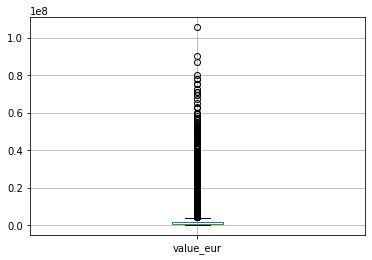

In [ ]:
boxplot = newestdf.boxplot(column=['value_eur']) 

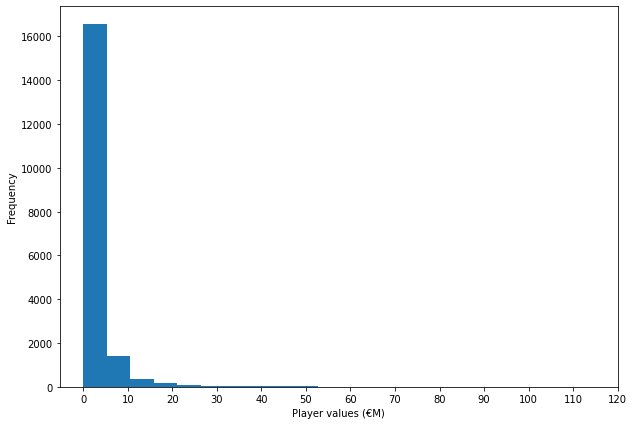

In [ ]:
#Plot frequency of player value ranges in €5 million intervals
fig = plt.figure(figsize = (10,7))
#Use 20 bins of player values. Value divided by 10^6 so x-axis units are in millions
(newestdf['value_eur']/10**6).plot.hist(bins = 20)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.xticks(np.arange(0,125,10))
plt.xlabel('Player values (€M)')
plt.show()

In [ ]:
newestdf.columns

Index(['preferred_foot', 'value_eur', 'age', 'height_cm', 'weight_kg',
       'overall', 'potential', 'wage_eur', 'weak_foot', 'skill_moves',
       'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_speed', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_hand

In [ ]:
newestdf

preferred_foot  value_eur       age  height_cm  weight_kg   overall  \
0                   0   67500000  0.629630   0.294118   0.366667  1.000000   
1                   1   46000000  0.703704   0.627451   0.550000  0.978261   
2                   1   75000000  0.407407   0.647059   0.616667  0.956522   
3                   1   80000000  0.555556   0.568627   0.500000  0.956522   
4                   1   90000000  0.444444   0.392157   0.300000  0.956522   
...               ...        ...       ...        ...        ...       ...   
18939               1      40000  0.296296   0.411765   0.383333  0.000000   
18940               1      35000  0.185185   0.431373   0.333333  0.000000   
18941               1      35000  0.148148   0.588235   0.400000  0.000000   
18942               1      40000  0.259259   0.607843   0.500000  0.000000   
18943               1      30000  0.444444   0.588235   0.483333  0.000000   

       potential  wage_eur  weak_foot  skill_moves  ...  \
0       0.958333  1.000000       0.75         0.75  ...   
1       0.937500  0.392315       0.75         1.00  ...   
2       0.958333  0.222520       0.50         0.00  ...   
3       0.916667  0.428061       0.75         0.75  ...   
4       0.916667  0.481680       1.00         1.00  ...   
...          ...       ...        ...          ...  ...   
18939   0.104167  0.000000       0.25         0.25  ...   
18940   0.104167  0.000894       0.25         0.25  ...   
18941   0.083333  0.000894       0.25         0.25  ...   
18942   0.083333  0.000894       0.25         0.25  ...   
18943   0.000000  0.002681       0.25         0.25  ...   

       defending_standing_tackle  defending_sliding_tackle  \
0                       0.340909                  0.232558   
1                       0.306818                  0.232558   
2                       0.079545                  0.162791   
3                       0.420455                  0.174419   
4                       0.284091                  0.290698   
...                          ...                       ...   
18939                   0.386364                  0.581395   
18940                   0.579545                  0.500000   
18941                   0.568182                  0.476744   
18942                   0.500000                  0.476744   
18943                   0.431818                  0.476744   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                0.056180              0.109890             0.152174   
1                0.067416              0.109890             0.152174   
2                0.966292              1.000000             0.836957   
3                0.157303              0.054945             0.119565   
4                0.089888              0.087912             0.152174   
...                   ...                   ...                  ...   
18939            0.101124              0.087912             0.141304   
18940            0.123596              0.131868             0.076087   
18941            0.123596              0.087912             0.141304   
18942            0.157303              0.065934             0.065217   
18943            0.078652              0.043956             0.108696   

       goalkeeping_positioning  goalkeeping_reflexes  attacking_work_rate  \
0                     0.144444              0.078652                  0.5   
1                     0.144444              0.112360                  1.0   
2                     0.988889              1.000000                  0.5   
3                     0.077778              0.101124                  1.0   
4                     0.155556              0.112360                  1.0   
...                        ...                   ...                  ...   
18939                 0.055556              0.056180                  0.5   
18940                 0.144444              0.056180                  0.0   
18941                 0.155556              0.134831      

split dataset for goalkeepers and for outfield players this is done since goalkeepers and outfield players are effectived by different statistics for example, Lionel Messi will not need any data on goalkeeper handling

In [ ]:
#goalkeeper_dataframe = joined_dataframe['player_positions_one'] == "GK"
goalkeepers = ['GK']
goalkeepers_dataframe = newestdf[newestdf['player_positions_one'] == 1] 

In [ ]:
goalkeepers_dataframe

preferred_foot  value_eur       age  height_cm  weight_kg   overall  \
2                   1   75000000  0.407407   0.647059   0.616667  0.956522   
7                   1   69500000  0.444444   0.627451   0.583333  0.934783   
9                   1   62500000  0.407407   0.705882   0.683333  0.934783   
12                  0   56000000  0.444444   0.862745   0.766667  0.913043   
16                  1   29000000  0.666667   0.745098   0.700000  0.913043   
...               ...        ...       ...        ...        ...       ...   
18892               1      50000  0.037037   0.392157   0.333333  0.021739   
18908               0      40000  0.185185   0.588235   0.333333  0.021739   
18913               1      30000  0.000000   0.490196   0.433333  0.021739   
18924               1      30000  0.222222   0.803922   0.583333  0.021739   
18926               1      20000  0.518519   0.803922   0.500000  0.021739   

       potential  wage_eur  weak_foot  skill_moves  ...  \
2       0.958333  0.222520       0.50          0.0  ...   
7       0.958333  0.463807       0.75          0.0  ...   
9       0.916667  0.285076       0.50          0.0  ...   
12      0.895833  0.445934       0.50          0.0  ...   
16      0.875000  0.222520       0.75          0.0  ...   
...          ...       ...        ...          ...  ...   
18892   0.395833  0.000000       0.50          0.0  ...   
18908   0.250000  0.000000       0.25          0.0  ...   
18913   0.229167  0.000000       0.00          0.0  ...   
18924   0.104167  0.000894       0.25          0.0  ...   
18926   0.020833  0.000894       0.25          0.0  ...   

       defending_standing_tackle  defending_sliding_tackle  \
2                       0.079545                  0.162791   
7                       0.090909                  0.069767   
9                       0.159091                  0.139535   
12                      0.147727                  0.139535   
16                      0.056818                  0.081395   
...                          ...                       ...   
18892                   0.056818                  0.081395   
18908                   0.056818                  0.104651   
18913                   0.056818                  0.104651   
18924                   0.125000                  0.162791   
18926                   0.079545                  0.116279   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
2                0.966292              1.000000             0.836957   
7                0.977528              0.923077             0.945652   
9                0.955056              0.956044             0.913043   
12               0.932584              0.967033             0.793478   
16               0.966292              0.945055             0.978261   
...                   ...                   ...                  ...   
18892            0.539326              0.516484             0.500000   
18908            0.505618              0.494505             0.619565   
18913            0.516854              0.494505             0.489130   
18924            0.539326              0.505495             0.478261   
18926            0.561798              0.505495             0.456522   

       goalkeeping_positioning  goalkeeping_reflexes  attacking_work_rate  \
2                     0.988889              1.000000                  0.5   
7                     0.966667              1.000000                  0.5   
9                     1.000000              0.988764                  0.5   
12                    0.933333              0.977528                  0.5   
16                    0.944444              0.988764                  0.5   
...                        ...                   ...                  ...   
18892                 0.511111              0.550562                  0.5   
18908                 0.477778              0.561798                  0.5   
18913                 0.488889              0.550562      

In [ ]:
outfield_dataframe = newestdf[newestdf['player_positions_one'] != 1]
outfield_dataframe

preferred_foot  value_eur       age  height_cm  weight_kg   overall  \
0                   0   67500000  0.629630   0.294118   0.366667  1.000000   
1                   1   46000000  0.703704   0.627451   0.550000  0.978261   
3                   1   80000000  0.555556   0.568627   0.500000  0.956522   
4                   1   90000000  0.444444   0.392157   0.300000  0.956522   
5                   1   87000000  0.481481   0.509804   0.333333  0.956522   
...               ...        ...       ...        ...        ...       ...   
18939               1      40000  0.296296   0.411765   0.383333  0.000000   
18940               1      35000  0.185185   0.431373   0.333333  0.000000   
18941               1      35000  0.148148   0.588235   0.400000  0.000000   
18942               1      40000  0.259259   0.607843   0.500000  0.000000   
18943               1      30000  0.444444   0.588235   0.483333  0.000000   

       potential  wage_eur  weak_foot  skill_moves  ...  \
0       0.958333  1.000000       0.75         0.75  ...   
1       0.937500  0.392315       0.75         1.00  ...   
3       0.916667  0.428061       0.75         0.75  ...   
4       0.916667  0.481680       1.00         1.00  ...   
5       0.916667  0.660411       1.00         0.75  ...   
...          ...       ...        ...          ...  ...   
18939   0.104167  0.000000       0.25         0.25  ...   
18940   0.104167  0.000894       0.25         0.25  ...   
18941   0.083333  0.000894       0.25         0.25  ...   
18942   0.083333  0.000894       0.25         0.25  ...   
18943   0.000000  0.002681       0.25         0.25  ...   

       defending_standing_tackle  defending_sliding_tackle  \
0                       0.340909                  0.232558   
1                       0.306818                  0.232558   
3                       0.420455                  0.174419   
4                       0.284091                  0.290698   
5                       0.681818                  0.569767   
...                          ...                       ...   
18939                   0.386364                  0.581395   
18940                   0.579545                  0.500000   
18941                   0.568182                  0.476744   
18942                   0.500000                  0.476744   
18943                   0.431818                  0.476744   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                0.056180              0.109890             0.152174   
1                0.067416              0.109890             0.152174   
3                0.157303              0.054945             0.119565   
4                0.089888              0.087912             0.152174   
5                0.157303              0.131868             0.043478   
...                   ...                   ...                  ...   
18939            0.101124              0.087912             0.141304   
18940            0.123596              0.131868             0.076087   
18941            0.123596              0.087912             0.141304   
18942            0.157303              0.065934             0.065217   
18943            0.078652              0.043956             0.108696   

       goalkeeping_positioning  goalkeeping_reflexes  attacking_work_rate  \
0                     0.144444              0.078652                  0.5   
1                     0.144444              0.112360                  1.0   
3                     0.077778              0.101124                  1.0   
4                     0.155556              0.112360                  1.0   
5                     0.100000              0.134831                  1.0   
...                        ...                   ...                  ...   
18939                 0.055556              0.056180                  0.5   
18940                 0.144444              0.056180                  0.0   
18941                 0.155556              0.134831      

169 goalkeepers remain in the dataset the rest are outfield players


Packages and KNN run on the data

In [ ]:
goalkeepers_dataframe

preferred_foot  value_eur       age  height_cm  weight_kg   overall  \
2                   1   75000000  0.407407   0.647059   0.616667  0.956522   
7                   1   69500000  0.444444   0.627451   0.583333  0.934783   
9                   1   62500000  0.407407   0.705882   0.683333  0.934783   
12                  0   56000000  0.444444   0.862745   0.766667  0.913043   
16                  1   29000000  0.666667   0.745098   0.700000  0.913043   
...               ...        ...       ...        ...        ...       ...   
18892               1      50000  0.037037   0.392157   0.333333  0.021739   
18908               0      40000  0.185185   0.588235   0.333333  0.021739   
18913               1      30000  0.000000   0.490196   0.433333  0.021739   
18924               1      30000  0.222222   0.803922   0.583333  0.021739   
18926               1      20000  0.518519   0.803922   0.500000  0.021739   

       potential  wage_eur  weak_foot  skill_moves  ...  \
2       0.958333  0.222520       0.50          0.0  ...   
7       0.958333  0.463807       0.75          0.0  ...   
9       0.916667  0.285076       0.50          0.0  ...   
12      0.895833  0.445934       0.50          0.0  ...   
16      0.875000  0.222520       0.75          0.0  ...   
...          ...       ...        ...          ...  ...   
18892   0.395833  0.000000       0.50          0.0  ...   
18908   0.250000  0.000000       0.25          0.0  ...   
18913   0.229167  0.000000       0.00          0.0  ...   
18924   0.104167  0.000894       0.25          0.0  ...   
18926   0.020833  0.000894       0.25          0.0  ...   

       defending_standing_tackle  defending_sliding_tackle  \
2                       0.079545                  0.162791   
7                       0.090909                  0.069767   
9                       0.159091                  0.139535   
12                      0.147727                  0.139535   
16                      0.056818                  0.081395   
...                          ...                       ...   
18892                   0.056818                  0.081395   
18908                   0.056818                  0.104651   
18913                   0.056818                  0.104651   
18924                   0.125000                  0.162791   
18926                   0.079545                  0.116279   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
2                0.966292              1.000000             0.836957   
7                0.977528              0.923077             0.945652   
9                0.955056              0.956044             0.913043   
12               0.932584              0.967033             0.793478   
16               0.966292              0.945055             0.978261   
...                   ...                   ...                  ...   
18892            0.539326              0.516484             0.500000   
18908            0.505618              0.494505             0.619565   
18913            0.516854              0.494505             0.489130   
18924            0.539326              0.505495             0.478261   
18926            0.561798              0.505495             0.456522   

       goalkeeping_positioning  goalkeeping_reflexes  attacking_work_rate  \
2                     0.988889              1.000000                  0.5   
7                     0.966667              1.000000                  0.5   
9                     1.000000              0.988764                  0.5   
12                    0.933333              0.977528                  0.5   
16                    0.944444              0.988764                  0.5   
...                        ...                   ...                  ...   
18892                 0.511111              0.550562                  0.5   
18908                 0.477778              0.561798                  0.5   
18913                 0.488889              0.550562      

In [ ]:
goalkeepers_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 2 to 18926
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   preferred_foot              2054 non-null   int64  
 1   value_eur                   2054 non-null   int64  
 2   age                         2054 non-null   float64
 3   height_cm                   2054 non-null   float64
 4   weight_kg                   2054 non-null   float64
 5   overall                     2054 non-null   float64
 6   potential                   2054 non-null   float64
 7   wage_eur                    2054 non-null   float64
 8   weak_foot                   2054 non-null   float64
 9   skill_moves                 2054 non-null   float64
 10  contract_valid_until        2054 non-null   float64
 11  pace                        1 non-null      float64
 12  shooting                    1 non-null      float64
 13  passing                     1 no

 12  pace                        0 non-null      float64
 13  shooting                    0 non-null      float64
 14  passing                     0 non-null      float64
 15  dribbling                   0 non-null      float64
 16  defending                   0 non-null      float64
 17  physic                      0 non-null      float64

 As shown in the data contains nulls in the following columns  for goalkeeper dataframe 

In [ ]:
deletedRows = ["shooting", "pace","passing", "dribbling", "defending", "physic", "skill_moves"]

goalkeepers_dataframe.drop(columns = deletedRows, inplace=True) 



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
goalkeepers_dataframe

preferred_foot  value_eur       age  height_cm  weight_kg   overall  \
2                   1   75000000  0.407407   0.647059   0.616667  0.956522   
7                   1   69500000  0.444444   0.627451   0.583333  0.934783   
9                   1   62500000  0.407407   0.705882   0.683333  0.934783   
12                  0   56000000  0.444444   0.862745   0.766667  0.913043   
16                  1   29000000  0.666667   0.745098   0.700000  0.913043   
...               ...        ...       ...        ...        ...       ...   
18892               1      50000  0.037037   0.392157   0.333333  0.021739   
18908               0      40000  0.185185   0.588235   0.333333  0.021739   
18913               1      30000  0.000000   0.490196   0.433333  0.021739   
18924               1      30000  0.222222   0.803922   0.583333  0.021739   
18926               1      20000  0.518519   0.803922   0.500000  0.021739   

       potential  wage_eur  weak_foot  contract_valid_until  ...  \
2       0.958333  0.222520       0.50                 0.375  ...   
7       0.958333  0.463807       0.75                 0.250  ...   
9       0.916667  0.285076       0.50                 0.500  ...   
12      0.895833  0.445934       0.50                 0.500  ...   
16      0.875000  0.222520       0.75                 0.375  ...   
...          ...       ...        ...                   ...  ...   
18892   0.395833  0.000000       0.50                 0.125  ...   
18908   0.250000  0.000000       0.25                 0.500  ...   
18913   0.229167  0.000000       0.00                 0.000  ...   
18924   0.104167  0.000894       0.25                 0.500  ...   
18926   0.020833  0.000894       0.25                 0.125  ...   

       defending_standing_tackle  defending_sliding_tackle  \
2                       0.079545                  0.162791   
7                       0.090909                  0.069767   
9                       0.159091                  0.139535   
12                      0.147727                  0.139535   
16                      0.056818                  0.081395   
...                          ...                       ...   
18892                   0.056818                  0.081395   
18908                   0.056818                  0.104651   
18913                   0.056818                  0.104651   
18924                   0.125000                  0.162791   
18926                   0.079545                  0.116279   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
2                0.966292              1.000000             0.836957   
7                0.977528              0.923077             0.945652   
9                0.955056              0.956044             0.913043   
12               0.932584              0.967033             0.793478   
16               0.966292              0.945055             0.978261   
...                   ...                   ...                  ...   
18892            0.539326              0.516484             0.500000   
18908            0.505618              0.494505             0.619565   
18913            0.516854              0.494505             0.489130   
18924            0.539326              0.505495             0.478261   
18926            0.561798              0.505495             0.456522   

       goalkeeping_positioning  goalkeeping_reflexes  attacking_work_rate  \
2                     0.988889              1.000000                  0.5   
7                     0.966667              1.000000                  0.5   
9                     1.000000              0.988764                  0.5   
12                    0.933333              0.977528                  0.5   
16                    0.944444              0.988764                  0.5   
...                        ...                   ...                  ...   
18892                 0.511111              0.550562                  0.5   
18908                 0.477

In [ ]:
goalkeepers_dataframe

preferred_foot  value_eur       age  height_cm  weight_kg   overall  \
2                   1   75000000  0.407407   0.647059   0.616667  0.956522   
7                   1   69500000  0.444444   0.627451   0.583333  0.934783   
9                   1   62500000  0.407407   0.705882   0.683333  0.934783   
12                  0   56000000  0.444444   0.862745   0.766667  0.913043   
16                  1   29000000  0.666667   0.745098   0.700000  0.913043   
...               ...        ...       ...        ...        ...       ...   
18892               1      50000  0.037037   0.392157   0.333333  0.021739   
18908               0      40000  0.185185   0.588235   0.333333  0.021739   
18913               1      30000  0.000000   0.490196   0.433333  0.021739   
18924               1      30000  0.222222   0.803922   0.583333  0.021739   
18926               1      20000  0.518519   0.803922   0.500000  0.021739   

       potential  wage_eur  weak_foot  contract_valid_until  ...  \
2       0.958333  0.222520       0.50                 0.375  ...   
7       0.958333  0.463807       0.75                 0.250  ...   
9       0.916667  0.285076       0.50                 0.500  ...   
12      0.895833  0.445934       0.50                 0.500  ...   
16      0.875000  0.222520       0.75                 0.375  ...   
...          ...       ...        ...                   ...  ...   
18892   0.395833  0.000000       0.50                 0.125  ...   
18908   0.250000  0.000000       0.25                 0.500  ...   
18913   0.229167  0.000000       0.00                 0.000  ...   
18924   0.104167  0.000894       0.25                 0.500  ...   
18926   0.020833  0.000894       0.25                 0.125  ...   

       defending_standing_tackle  defending_sliding_tackle  \
2                       0.079545                  0.162791   
7                       0.090909                  0.069767   
9                       0.159091                  0.139535   
12                      0.147727                  0.139535   
16                      0.056818                  0.081395   
...                          ...                       ...   
18892                   0.056818                  0.081395   
18908                   0.056818                  0.104651   
18913                   0.056818                  0.104651   
18924                   0.125000                  0.162791   
18926                   0.079545                  0.116279   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
2                0.966292              1.000000             0.836957   
7                0.977528              0.923077             0.945652   
9                0.955056              0.956044             0.913043   
12               0.932584              0.967033             0.793478   
16               0.966292              0.945055             0.978261   
...                   ...                   ...                  ...   
18892            0.539326              0.516484             0.500000   
18908            0.505618              0.494505             0.619565   
18913            0.516854              0.494505             0.489130   
18924            0.539326              0.505495             0.478261   
18926            0.561798              0.505495             0.456522   

       goalkeeping_positioning  goalkeeping_reflexes  attacking_work_rate  \
2                     0.988889              1.000000                  0.5   
7                     0.966667              1.000000                  0.5   
9                     1.000000              0.988764                  0.5   
12                    0.933333              0.977528                  0.5   
16                    0.944444              0.988764                  0.5   
...                        ...                   ...                  ...   
18892                 0.511111              0.550562                  0.5   
18908                 0.477

In [ ]:
outfield_dataframe

preferred_foot  value_eur       age  height_cm  weight_kg   overall  \
0                   0   67500000  0.629630   0.294118   0.366667  1.000000   
1                   1   46000000  0.703704   0.627451   0.550000  0.978261   
3                   1   80000000  0.555556   0.568627   0.500000  0.956522   
4                   1   90000000  0.444444   0.392157   0.300000  0.956522   
5                   1   87000000  0.481481   0.509804   0.333333  0.956522   
...               ...        ...       ...        ...        ...       ...   
18939               1      40000  0.296296   0.411765   0.383333  0.000000   
18940               1      35000  0.185185   0.431373   0.333333  0.000000   
18941               1      35000  0.148148   0.588235   0.400000  0.000000   
18942               1      40000  0.259259   0.607843   0.500000  0.000000   
18943               1      30000  0.444444   0.588235   0.483333  0.000000   

       potential  wage_eur  weak_foot  skill_moves  ...  \
0       0.958333  1.000000       0.75         0.75  ...   
1       0.937500  0.392315       0.75         1.00  ...   
3       0.916667  0.428061       0.75         0.75  ...   
4       0.916667  0.481680       1.00         1.00  ...   
5       0.916667  0.660411       1.00         0.75  ...   
...          ...       ...        ...          ...  ...   
18939   0.104167  0.000000       0.25         0.25  ...   
18940   0.104167  0.000894       0.25         0.25  ...   
18941   0.083333  0.000894       0.25         0.25  ...   
18942   0.083333  0.000894       0.25         0.25  ...   
18943   0.000000  0.002681       0.25         0.25  ...   

       defending_standing_tackle  defending_sliding_tackle  \
0                       0.340909                  0.232558   
1                       0.306818                  0.232558   
3                       0.420455                  0.174419   
4                       0.284091                  0.290698   
5                       0.681818                  0.569767   
...                          ...                       ...   
18939                   0.386364                  0.581395   
18940                   0.579545                  0.500000   
18941                   0.568182                  0.476744   
18942                   0.500000                  0.476744   
18943                   0.431818                  0.476744   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                0.056180              0.109890             0.152174   
1                0.067416              0.109890             0.152174   
3                0.157303              0.054945             0.119565   
4                0.089888              0.087912             0.152174   
5                0.157303              0.131868             0.043478   
...                   ...                   ...                  ...   
18939            0.101124              0.087912             0.141304   
18940            0.123596              0.131868             0.076087   
18941            0.123596              0.087912             0.141304   
18942            0.157303              0.065934             0.065217   
18943            0.078652              0.043956             0.108696   

       goalkeeping_positioning  goalkeeping_reflexes  attacking_work_rate  \
0                     0.144444              0.078652                  0.5   
1                     0.144444              0.112360                  1.0   
3                     0.077778              0.101124                  1.0   
4                     0.155556              0.112360                  1.0   
5                     0.100000              0.134831                  1.0   
...                        ...                   ...                  ...   
18939                 0.055556              0.056180                  0.5   
18940                 0.144444              0.056180                  0.0   
18941                 0.155556              0.134831      

In [ ]:
goalkeepers_dataframe.columns

Index(['preferred_foot', 'value_eur', 'age', 'height_cm', 'weight_kg',
       'overall', 'potential', 'wage_eur', 'weak_foot', 'contract_valid_until',
       'gk_speed', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes',
 

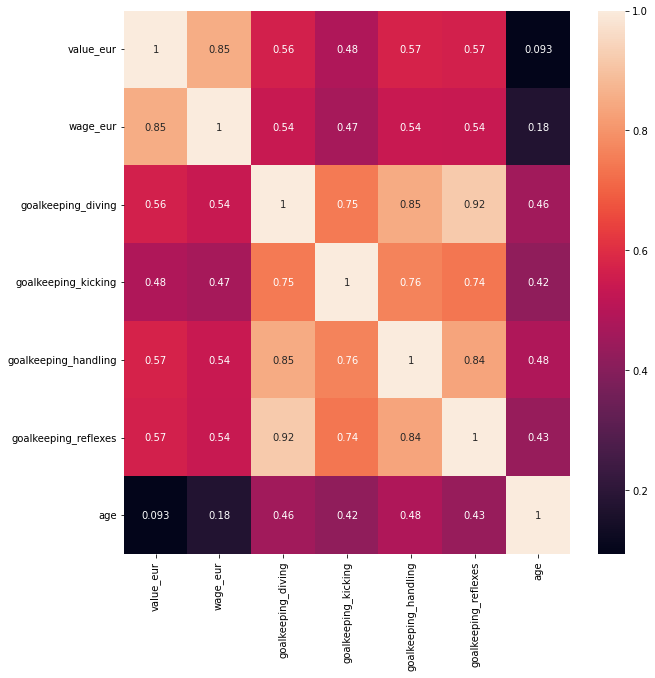

In [ ]:
# optional: resize images from now on
plt.rcParams["figure.figsize"] = (10, 10)

# numeric_only_columns is a list of columns of the DataFrame
# containing numerical data only
# annot = True to visualize the correlation factor

sns.heatmap(goalkeepers_dataframe[['value_eur', 'wage_eur','goalkeeping_diving','goalkeeping_kicking','goalkeeping_handling','goalkeeping_reflexes','age']].corr(), annot = True)
plt.show()

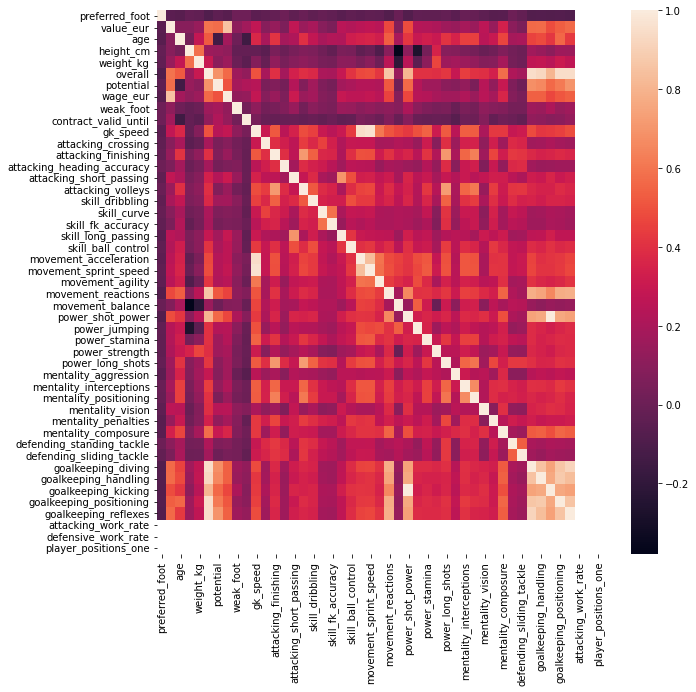

In [ ]:
# optional: resize images from now on
plt.rcParams["figure.figsize"] = (10, 10)

# numeric_only_columns is a list of columns of the DataFrame
# containing numerical data only
# annot = True to visualize the correlation factor

sns.heatmap(goalkeepers_dataframe.corr(), annot = False)
plt.show()

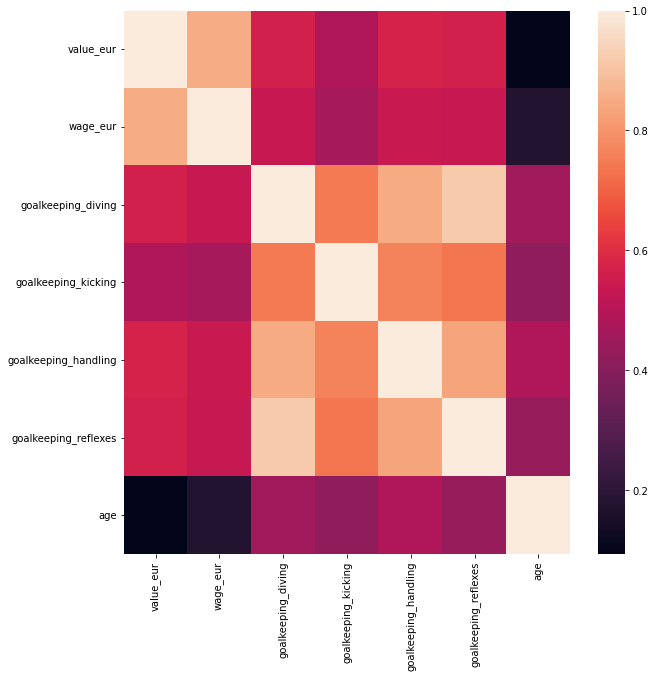

In [ ]:
# optional: resize images from now on
plt.rcParams["figure.figsize"] = (10, 10)

# numeric_only_columns is a list of columns of the DataFrame
# containing numerical data only
# annot = True to visualize the correlation factor

sns.heatmap(goalkeepers_dataframe[['value_eur', 'wage_eur','goalkeeping_diving','goalkeeping_kicking','goalkeeping_handling','goalkeeping_reflexes','age']].corr(), annot = False)
plt.show()

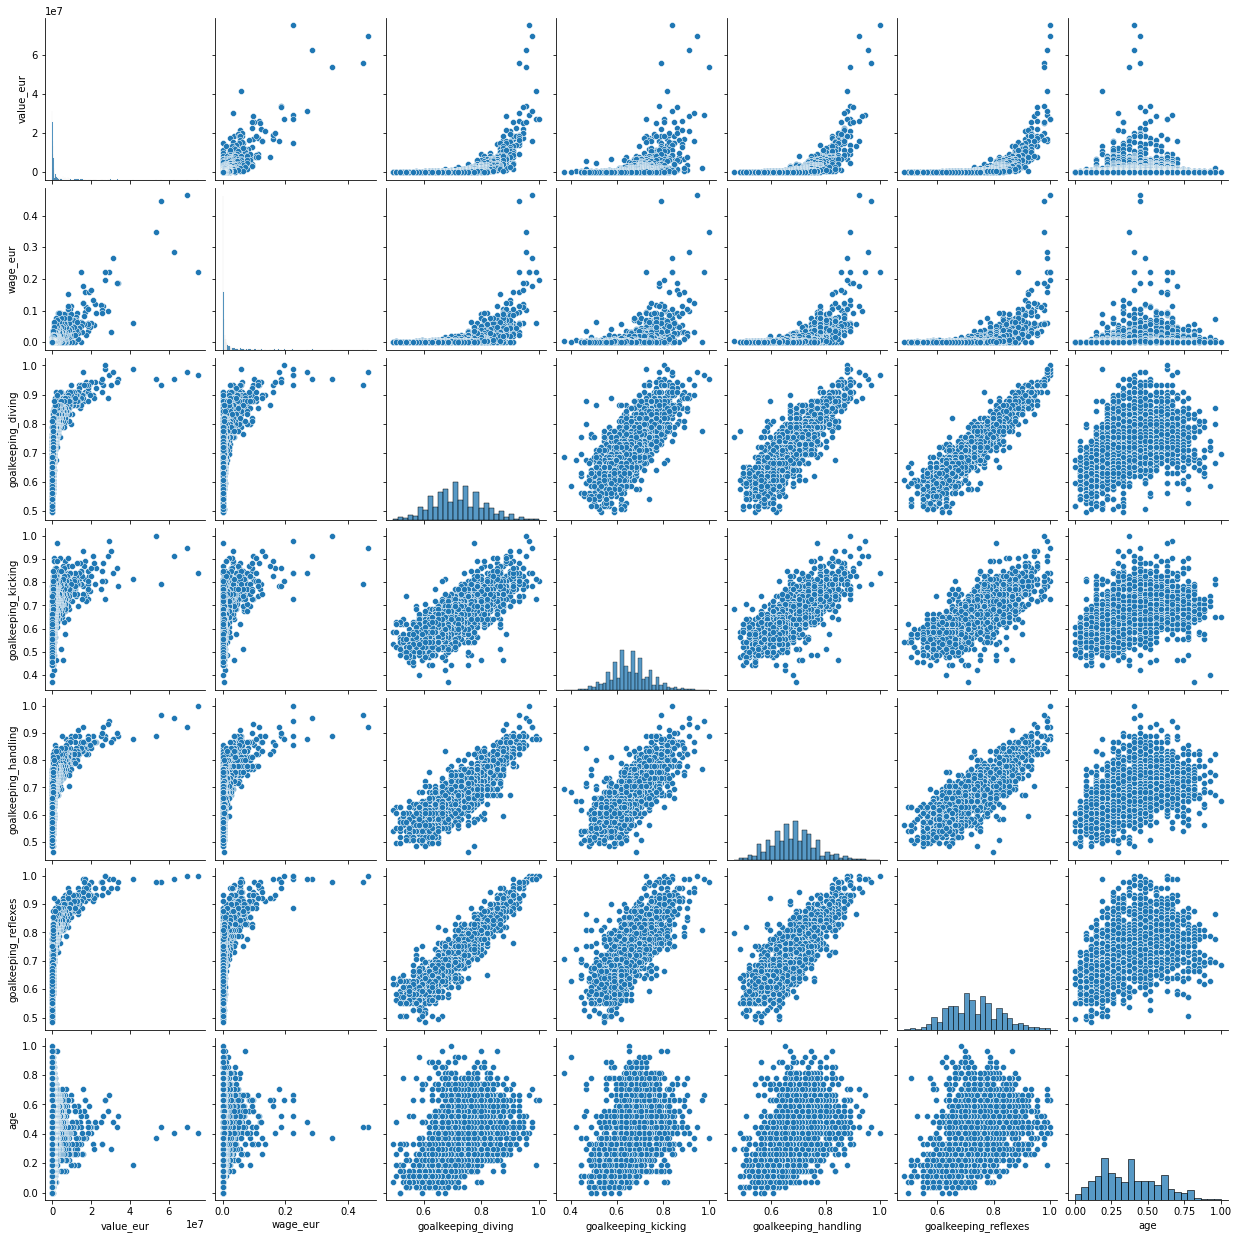

In [ ]:
sns.pairplot(goalkeepers_dataframe[['value_eur', 'wage_eur','goalkeeping_diving','goalkeeping_kicking','goalkeeping_handling','goalkeeping_reflexes','age']])

In [ ]:
goalkeepers_dataframe.dropna(inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
outfield_dataframe

preferred_foot  value_eur       age  height_cm  weight_kg   overall  \
0                   0   67500000  0.629630   0.294118   0.366667  1.000000   
1                   1   46000000  0.703704   0.627451   0.550000  0.978261   
3                   1   80000000  0.555556   0.568627   0.500000  0.956522   
4                   1   90000000  0.444444   0.392157   0.300000  0.956522   
5                   1   87000000  0.481481   0.509804   0.333333  0.956522   
...               ...        ...       ...        ...        ...       ...   
18939               1      40000  0.296296   0.411765   0.383333  0.000000   
18940               1      35000  0.185185   0.431373   0.333333  0.000000   
18941               1      35000  0.148148   0.588235   0.400000  0.000000   
18942               1      40000  0.259259   0.607843   0.500000  0.000000   
18943               1      30000  0.444444   0.588235   0.483333  0.000000   

       potential  wage_eur  weak_foot  skill_moves  ...  \
0       0.958333  1.000000       0.75         0.75  ...   
1       0.937500  0.392315       0.75         1.00  ...   
3       0.916667  0.428061       0.75         0.75  ...   
4       0.916667  0.481680       1.00         1.00  ...   
5       0.916667  0.660411       1.00         0.75  ...   
...          ...       ...        ...          ...  ...   
18939   0.104167  0.000000       0.25         0.25  ...   
18940   0.104167  0.000894       0.25         0.25  ...   
18941   0.083333  0.000894       0.25         0.25  ...   
18942   0.083333  0.000894       0.25         0.25  ...   
18943   0.000000  0.002681       0.25         0.25  ...   

       defending_standing_tackle  defending_sliding_tackle  \
0                       0.340909                  0.232558   
1                       0.306818                  0.232558   
3                       0.420455                  0.174419   
4                       0.284091                  0.290698   
5                       0.681818                  0.569767   
...                          ...                       ...   
18939                   0.386364                  0.581395   
18940                   0.579545                  0.500000   
18941                   0.568182                  0.476744   
18942                   0.500000                  0.476744   
18943                   0.431818                  0.476744   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                0.056180              0.109890             0.152174   
1                0.067416              0.109890             0.152174   
3                0.157303              0.054945             0.119565   
4                0.089888              0.087912             0.152174   
5                0.157303              0.131868             0.043478   
...                   ...                   ...                  ...   
18939            0.101124              0.087912             0.141304   
18940            0.123596              0.131868             0.076087   
18941            0.123596              0.087912             0.141304   
18942            0.157303              0.065934             0.065217   
18943            0.078652              0.043956             0.108696   

       goalkeeping_positioning  goalkeeping_reflexes  attacking_work_rate  \
0                     0.144444              0.078652                  0.5   
1                     0.144444              0.112360                  1.0   
3                     0.077778              0.101124                  1.0   
4                     0.155556              0.112360                  1.0   
5                     0.100000              0.134831                  1.0   
...                        ...                   ...                  ...   
18939                 0.055556              0.056180                  0.5   
18940                 0.144444              0.056180                  0.0   
18941                 0.155556              0.134831      

We take the outfield player dataframe and use the information from the dataframe to take the goalkeeping attributes 

In [ ]:
# removing_goalkeeping_stats = ["gk_diving","gk_handling","gk_kicking","gk_reflexes","gk_speed", "gk_positioning"]
# outfield_dataframe.drop(columns = removing_goalkeeping_stats, inplace=True) 

In [ ]:
removing_goalkeeping_stats = ["gk_speed"]
outfield_dataframe.drop(columns = removing_goalkeeping_stats, inplace=True) 


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


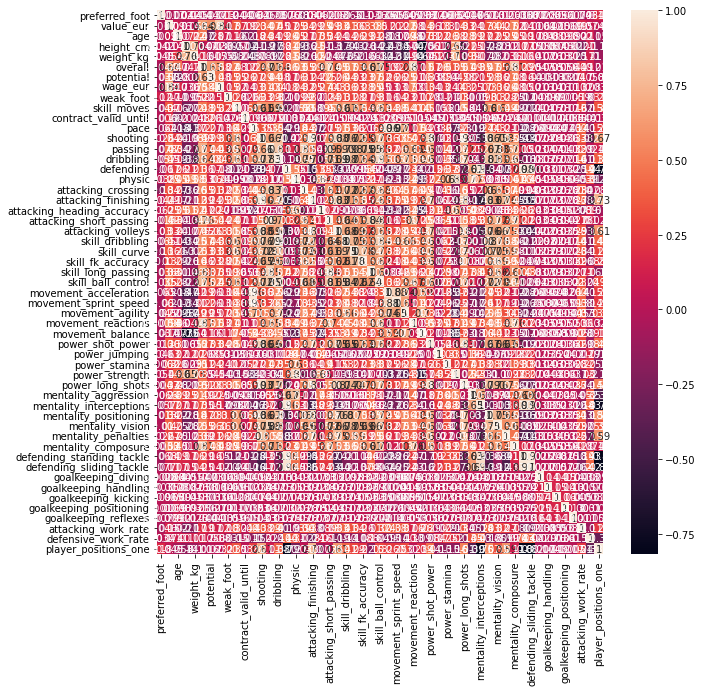

In [ ]:
# optional: resize images from now on
plt.rcParams["figure.figsize"] = (10, 10)

# numeric_only_columns is a list of columns of the DataFrame
# containing numerical data only
# annot = True to visualize the correlation factor

sns.heatmap(outfield_dataframe.corr(), annot = True)
plt.show()

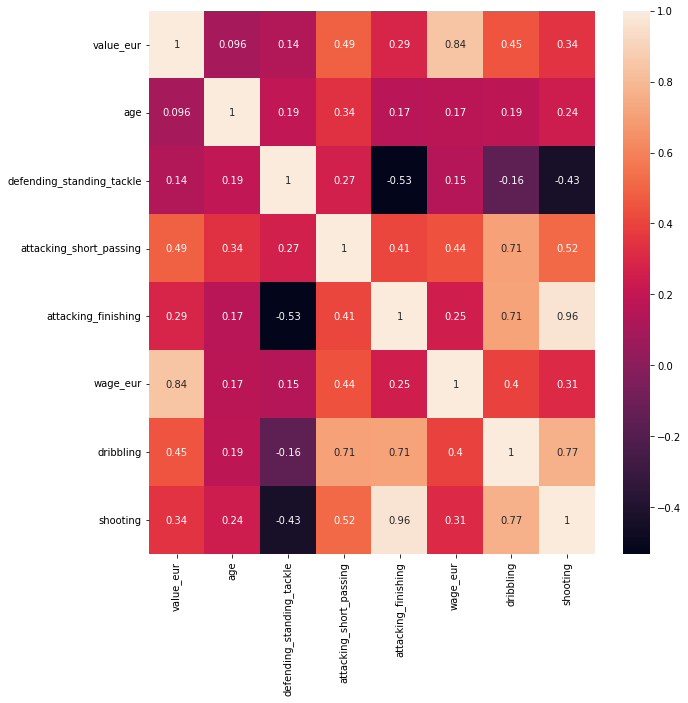

In [ ]:
# optional: resize images from now on
plt.rcParams["figure.figsize"] = (10, 10)

# numeric_only_columns is a list of columns of the DataFrame
# containing numerical data only
# annot = True to visualize the correlation factor

sns.heatmap(outfield_dataframe[['value_eur', 'age','defending_standing_tackle','attacking_short_passing','attacking_finishing','wage_eur','dribbling', 'shooting']].corr(), annot = True)
plt.show()

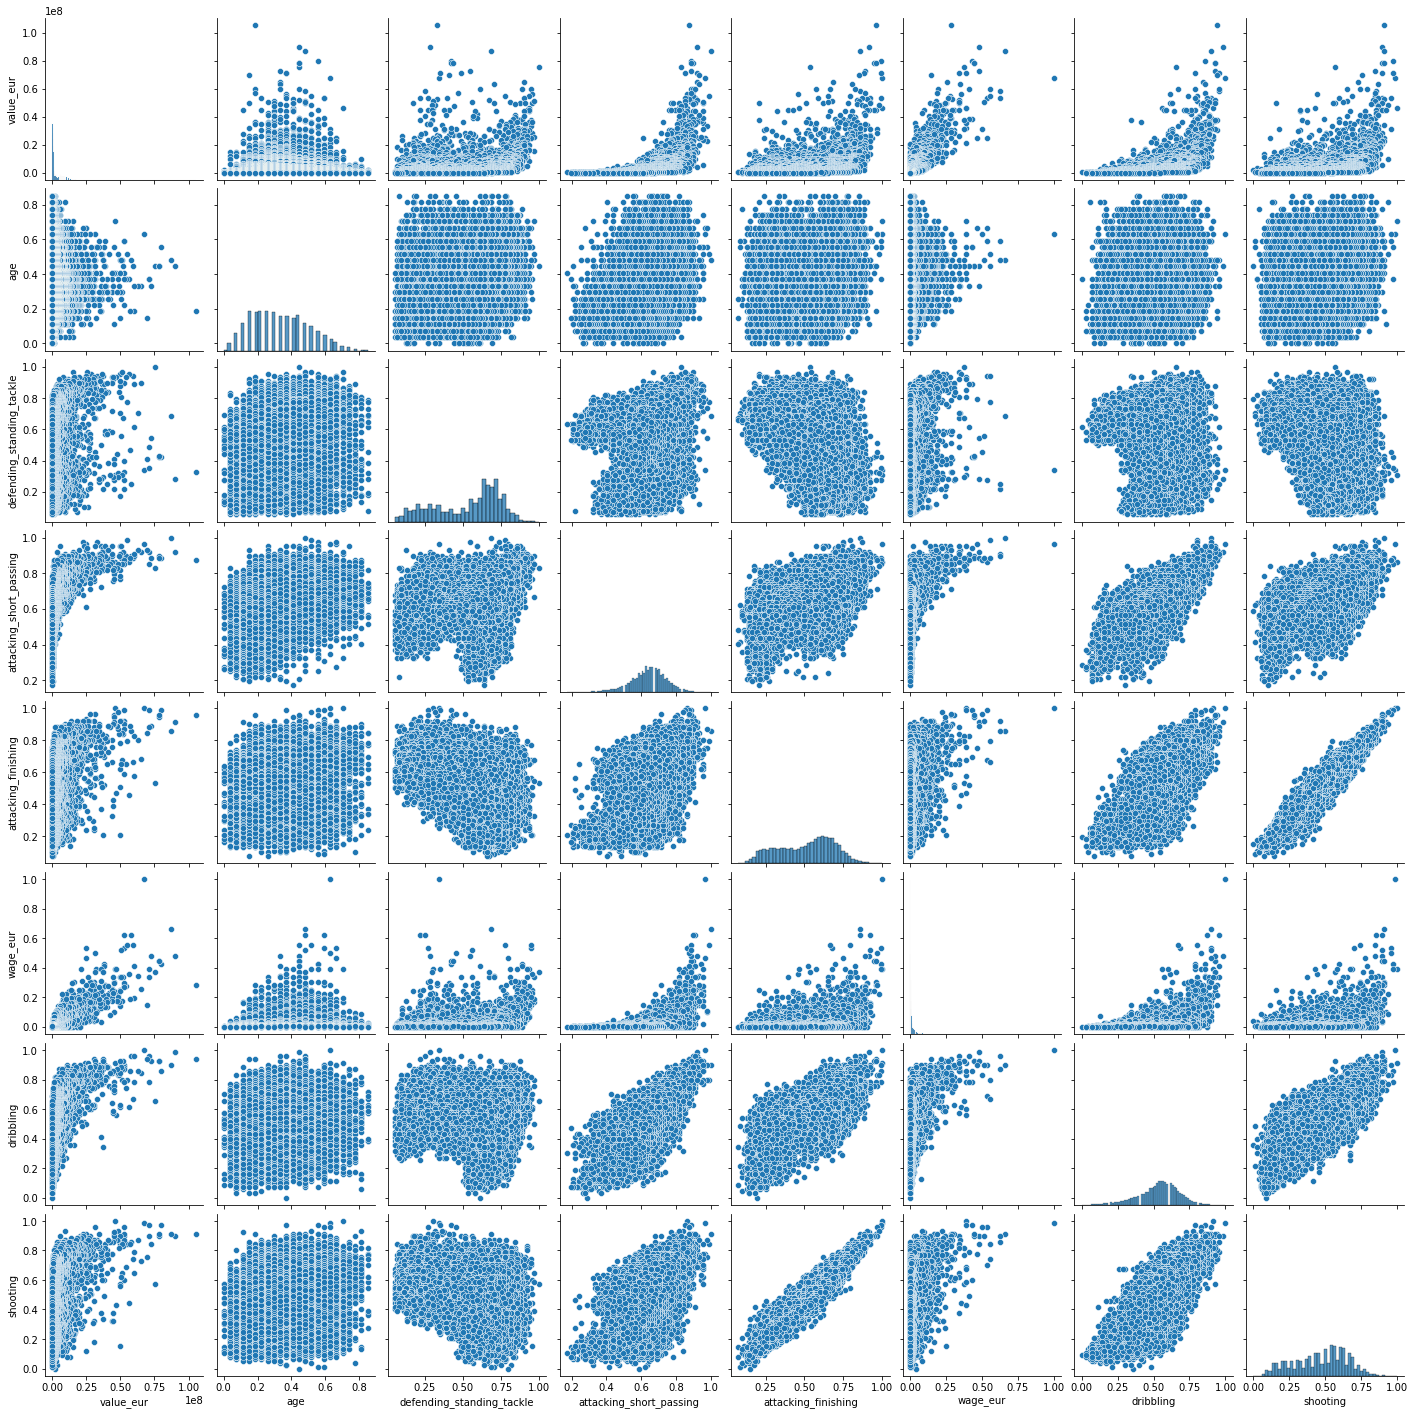

In [ ]:
sns.pairplot(outfield_dataframe[['value_eur', 'age','defending_standing_tackle','attacking_short_passing','attacking_finishing','wage_eur','dribbling', 'shooting']])

# Method for helping Plot the feature importance of the models

In [ ]:
def plotFeatureImportanceAsGraph(listOfFeatures,listOfFeatureImportanceVals, modelType):
  data={'feature_names':listOfFeatures,'feature_importance':listOfFeatureImportanceVals}
  df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=df['feature_importance'], y=df['feature_names'])
  #Add chart labels
  plt.title(modelType + ' FEATURE IMPORTANCE')
  plt.xlabel(' FEATURE IMPORTANCE')
  plt.ylabel(' FEATURE NAMES')

Method for all of the evaluative methods

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

def EvaluativeMethods(actualVals, predictedVals):
  array = []
  rmse = sqrt(mean_squared_error(actualVals, predictedVals))
  mse = mean_squared_error(actualVals,predictedVals)
  mae = mean_absolute_error(actualVals,predictedVals)
  rSquared = r2_score(actualVals, predictedVals)

  return rmse, mse, mae, rSquared

# The models that are going to be compared are:
# **KNN**
# **LR**
# **SVR**
# **Decision Tree**
# **Random Forest**


In [ ]:
!pip install wandb -qqq
import wandb

     |████████████████████████████████| 1.8 MB 6.9 MB/s 
     |████████████████████████████████| 145 kB 85.1 MB/s 
     |████████████████████████████████| 181 kB 66.9 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 


In [ ]:
# Log in to your W&B account
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
outfield_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16653 entries, 0 to 18943
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   preferred_foot              16653 non-null  int64  
 1   value_eur                   16653 non-null  int64  
 2   age                         16653 non-null  float64
 3   height_cm                   16653 non-null  float64
 4   weight_kg                   16653 non-null  float64
 5   overall                     16653 non-null  float64
 6   potential                   16653 non-null  float64
 7   wage_eur                    16653 non-null  float64
 8   weak_foot                   16653 non-null  float64
 9   skill_moves                 16653 non-null  float64
 10  contract_valid_until        16653 non-null  float64
 11  pace                        16653 non-null  float64
 12  shooting                    16653 non-null  float64
 13  passing                     166

In [ ]:
goalkeepers_dataframe

preferred_foot  value_eur       age  height_cm  weight_kg   overall  \
2                   1   75000000  0.407407   0.647059   0.616667  0.956522   
7                   1   69500000  0.444444   0.627451   0.583333  0.934783   
9                   1   62500000  0.407407   0.705882   0.683333  0.934783   
12                  0   56000000  0.444444   0.862745   0.766667  0.913043   
16                  1   29000000  0.666667   0.745098   0.700000  0.913043   
...               ...        ...       ...        ...        ...       ...   
18892               1      50000  0.037037   0.392157   0.333333  0.021739   
18908               0      40000  0.185185   0.588235   0.333333  0.021739   
18913               1      30000  0.000000   0.490196   0.433333  0.021739   
18924               1      30000  0.222222   0.803922   0.583333  0.021739   
18926               1      20000  0.518519   0.803922   0.500000  0.021739   

       potential  wage_eur  weak_foot  contract_valid_until  ...  \
2       0.958333  0.222520       0.50                 0.375  ...   
7       0.958333  0.463807       0.75                 0.250  ...   
9       0.916667  0.285076       0.50                 0.500  ...   
12      0.895833  0.445934       0.50                 0.500  ...   
16      0.875000  0.222520       0.75                 0.375  ...   
...          ...       ...        ...                   ...  ...   
18892   0.395833  0.000000       0.50                 0.125  ...   
18908   0.250000  0.000000       0.25                 0.500  ...   
18913   0.229167  0.000000       0.00                 0.000  ...   
18924   0.104167  0.000894       0.25                 0.500  ...   
18926   0.020833  0.000894       0.25                 0.125  ...   

       defending_standing_tackle  defending_sliding_tackle  \
2                       0.079545                  0.162791   
7                       0.090909                  0.069767   
9                       0.159091                  0.139535   
12                      0.147727                  0.139535   
16                      0.056818                  0.081395   
...                          ...                       ...   
18892                   0.056818                  0.081395   
18908                   0.056818                  0.104651   
18913                   0.056818                  0.104651   
18924                   0.125000                  0.162791   
18926                   0.079545                  0.116279   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
2                0.966292              1.000000             0.836957   
7                0.977528              0.923077             0.945652   
9                0.955056              0.956044             0.913043   
12               0.932584              0.967033             0.793478   
16               0.966292              0.945055             0.978261   
...                   ...                   ...                  ...   
18892            0.539326              0.516484             0.500000   
18908            0.505618              0.494505             0.619565   
18913            0.516854              0.494505             0.489130   
18924            0.539326              0.505495             0.478261   
18926            0.561798              0.505495             0.456522   

       goalkeeping_positioning  goalkeeping_reflexes  attacking_work_rate  \
2                     0.988889              1.000000                  0.5   
7                     0.966667              1.000000                  0.5   
9                     1.000000              0.988764                  0.5   
12                    0.933333              0.977528                  0.5   
16                    0.944444              0.988764                  0.5   
...                        ...                   ...                  ...   
18892                 0.511111              0.550562                  0.5   
18908                 0.477

# KNN

In [ ]:
train , test = train_test_split(goalkeepers_dataframe, shuffle=True, test_size = 0.2)

x_train = train.drop('value_eur', axis=1)
y_train = train['value_eur']

x_test = test.drop('value_eur', axis = 1)
y_test = test['value_eur']

knn = neighbors.KNeighborsRegressor()

# model = GridSearchCV(knn, params, cv=5)
# model.fit(x_train,y_train)
# model.best_params_
print(x_train.shape[0])
modelScore = []
rmse_val = [] #store rmse vals in array for each run (k value)
#math.sqrt(x_train.shape[0])+1
for K in range(int(math.sqrt(x_train.shape[0]))+1):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    modelScore.append(model.score(x_train, y_train))
    predictions =model.predict(x_test) #predictions on the test set 
    error = sqrt(mean_squared_error(y_test,predictions)) #RMSE calculation
    rmse_val.append(error) #rmse values kept into an array
    print('RMSE value for k= ' , K , 'is:', error)

1642
RMSE value for k=  1 is: 3125885.7641025493
RMSE value for k=  2 is: 3132862.3459562445
RMSE value for k=  3 is: 3072777.025738343
RMSE value for k=  4 is: 3126765.615060835
RMSE value for k=  5 is: 3208416.4257575045
RMSE value for k=  6 is: 3329863.506382934
RMSE value for k=  7 is: 3408849.016393198
RMSE value for k=  8 is: 3481624.0245319414
RMSE value for k=  9 is: 3439640.600403497
RMSE value for k=  10 is: 3462399.3129668175
RMSE value for k=  11 is: 3445451.4880237435
RMSE value for k=  12 is: 3471433.324036233
RMSE value for k=  13 is: 3484257.088516148
RMSE value for k=  14 is: 3396111.908583538
RMSE value for k=  15 is: 3347575.0234629386
RMSE value for k=  16 is: 3375812.937343996
RMSE value for k=  17 is: 3432943.714076699
RMSE value for k=  18 is: 3483590.316628093
RMSE value for k=  19 is: 3487425.745087143
RMSE value for k=  20 is: 3508781.221684877
RMSE value for k=  21 is: 3547661.1013122317
RMSE value for k=  22 is: 3575453.6308635767
RMSE value for k=  23 is: 3

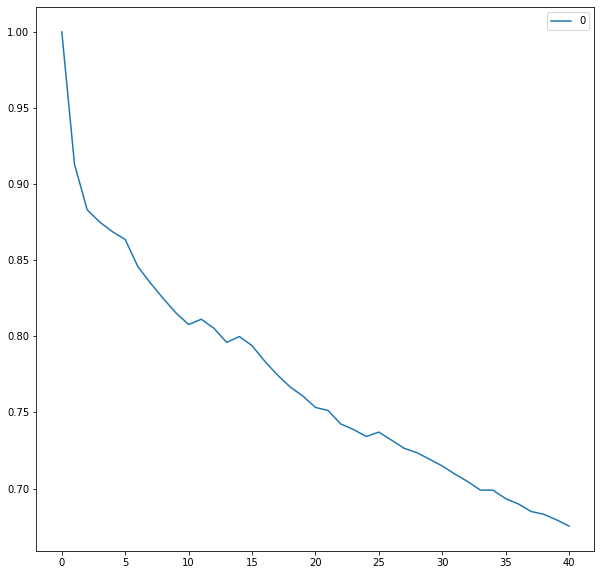

In [ ]:
line = pd.DataFrame(modelScore)
line.plot()


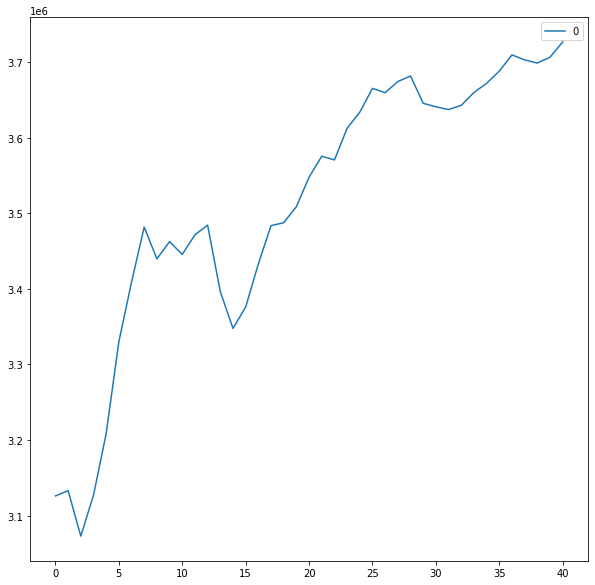

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

KNN Goalkeeper FIFA value Results

In [ ]:
train , test = train_test_split(goalkeepers_dataframe, shuffle=True, test_size = 0.2)

x_train = train.drop('value_eur', axis=1)
y_train = train['value_eur']

x_test = test.drop('value_eur', axis = 1)
y_test = test['value_eur']

knn = neighbors.KNeighborsRegressor()
knn.fit(x_train, y_train)  #fit the model
y_pred = knn.predict(x_test)
knn.n_neighbors

5

In [ ]:
x_test.iloc[[23]]

preferred_foot       age  height_cm  weight_kg   overall  potential  \
9915               1  0.296296   0.647059   0.466667  0.391304        0.5   

      wage_eur  weak_foot  contract_valid_until  gk_speed  ...  \
9915  0.015192       0.25                 0.375  0.415094  ...   

      defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
9915                   0.056818                  0.081395            0.730337   

      goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
9915              0.736264             0.652174                 0.677778   

      goalkeeping_reflexes  attacking_work_rate  defensive_work_rate  \
9915              0.752809                  0.5                  0.5   

      player_positions_one  
9915                     1  

[1 rows x 46 columns]

Shap values

In [ ]:
knn.predict(x_test.iloc[[23]])

array([415000.])

In [ ]:
y_test.iloc[[23]]

9915    550000
Name: value_eur, dtype: int64

In [ ]:
EvaluativeMethods(y_test,y_pred)

(3656684.1839857036, 13371339221411.191, 927912.4087591241, 0.721548524464962)

In [ ]:
# run = wandb.init(project='my-scikit-integration', name="regressionGraphs")

In [ ]:
# wandb.sklearn.plot_regressor(knn, x_train, x_test, y_train, y_test,  model_name='KNN')
# wandb.finish()

In [ ]:
model.feature_names = (x_train.columns.values)

KNN model prediction on the x_test data and shown in the array below

In [ ]:
model.predict(x_test)

array([  965487.80487805,   729390.24390244,   679268.29268293,
         494878.04878049,   335121.95121951,  1712560.97560976,
        1261951.2195122 ,    78658.53658537,  1608902.43902439,
        3547317.07317073,  1848048.7804878 ,   437926.82926829,
         660365.85365854,  5682926.82926829,  1442926.82926829,
         642560.97560976,   141097.56097561,  2684390.24390244,
         513414.63414634,   292804.87804878,   486097.56097561,
         546219.51219512,  1263292.68292683,   506585.36585366,
         353170.73170732,   250731.70731707,   347804.87804878,
         142926.82926829,  1956463.41463415,   417439.02439024,
         481707.31707317,   176829.26829268,   296951.2195122 ,
       11265853.65853659,  5551219.51219512,  1129634.14634146,
         532682.92682927,   102804.87804878,   150609.75609756,
         536585.36585366,   650365.85365854,   437439.02439024,
        2162926.82926829,   355000.        ,   412073.17073171,
        1669756.09756098,   563048.78048

In [ ]:
x_test.iloc[[23]]

preferred_foot       age  height_cm  weight_kg   overall  potential  \
9915               1  0.296296   0.647059   0.466667  0.391304        0.5   

      wage_eur  weak_foot  contract_valid_until  gk_speed  ...  \
9915  0.015192       0.25                 0.375  0.415094  ...   

      defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
9915                   0.056818                  0.081395            0.730337   

      goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
9915              0.736264             0.652174                 0.677778   

      goalkeeping_reflexes  attacking_work_rate  defensive_work_rate  \
9915              0.752809                  0.5                  0.5   

      player_positions_one  
9915                     1  

[1 rows x 46 columns]

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
Using 411 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/411 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha *

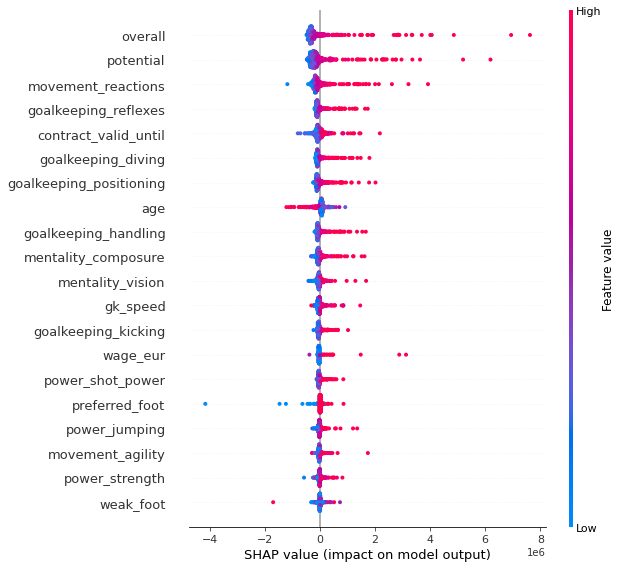

In [ ]:

explainer = shap.KernelExplainer(knn.predict, x_test)
shap.initjs()
# Get shap values for the test data observation whose index is 0, i.e. first observation in the test set
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test)


**outfield players**

In [ ]:
train , test = train_test_split(outfield_dataframe, test_size = 0.2)

x_train = train.drop('value_eur', axis=1)
y_train = train['value_eur']

x_test = test.drop('value_eur', axis = 1)
y_test = test['value_eur']

# params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

# model = GridSearchCV(knn, params, cv=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
#model.best_params_

In [ ]:
x_test[:400]

preferred_foot       age  height_cm  weight_kg   overall  potential  \
13960               1  0.185185   0.352941   0.333333  0.304348   0.604167   
2046                1  0.148148   0.450980   0.300000  0.586957   0.812500   
2015                0  0.444444   0.450980   0.416667  0.608696   0.583333   
3351                1  0.407407   0.588235   0.583333  0.543478   0.541667   
15561               1  0.148148   0.431373   0.350000  0.260870   0.562500   
...               ...       ...        ...        ...       ...        ...   
14239               1  0.259259   0.509804   0.500000  0.304348   0.458333   
5101                1  0.444444   0.352941   0.316667  0.500000   0.479167   
12213               0  0.296296   0.607843   0.416667  0.347826   0.500000   
3178                1  0.185185   0.333333   0.333333  0.543478   0.666667   
17697               1  0.222222   0.549020   0.433333  0.173913   0.375000   

       wage_eur  weak_foot  skill_moves  contract_valid_until  ...  \
13960  0.000894       0.50         0.25                 0.250  ...   
2046   0.011618       0.50         0.50                 0.500  ...   
2015   0.022341       0.75         0.25                 0.375  ...   
3351   0.020554       0.50         0.50                 0.125  ...   
15561  0.000626       0.25         0.25                 0.125  ...   
...         ...        ...          ...                   ...  ...   
14239  0.002681       0.50         0.25                 0.125  ...   
5101   0.009830       0.50         0.50                 0.125  ...   
12213  0.002681       0.25         0.25                 0.250  ...   
3178   0.000000       0.50         0.50                 0.125  ...   
17697  0.000894       0.50         0.25                 0.125  ...   

       defending_standing_tackle  defending_sliding_tackle  \
13960                   0.704545                  0.639535   
2046                    0.772727                  0.767442   
2015                    0.818182                  0.837209   
3351                    0.238636                  0.232558   
15561                   0.227273                  0.197674   
...                          ...                       ...   
14239                   0.659091                  0.697674   
5101                    0.147727                  0.174419   
12213                   0.704545                  0.686047   
3178                    0.704545                  0.709302   
17697                   0.147727                  0.162791   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
13960            0.146067              0.098901             0.076087   
2046             0.056180              0.065934             0.097826   
2015             0.067416              0.065934             0.119565   
3351             0.123596              0.054945             0.097826   
15561            0.146067              0.054945             0.130435   
...                   ...                   ...                  ...   
14239            0.123596              0.120879             0.097826   
5101             0.157303              0.065934             0.152174   
12213            0.112360              0.131868             0.097826   
3178             0.067416              0.142857             0.086957   
17697            0.056180              0.120879             0.119565   

       goalkeeping_positioning  goalkeeping_reflexes  attacking_work_rate  \
13960                 0.144444              0.078652                  0.5   
2046                  0.066667              0.134831                  0.5   
2015                  0.077778              0.168539                  0.5   
3351                  0.077778              0.146067                  0.5   
15561                 0.066667              0.101124                  0.5   
...                        ...                   ...                  ...   
14239                 0.077778              0.101124                  0.5   
510

In [ ]:
explainer = shap.KernelExplainer(knn.predict, x_test[:400])
shap_values = explainer.shap_values(x_test[:400])
shap.summary_plot(shap_values, x_test[:400])

# explainer = shap.KernelExplainer(knn.predict_proba, X_train)
# # Get shap values for the test data observation whose index is 0, i.e. first observation in the test set
# shap_values = explainer.shap_values(X_test.iloc[0,:])
# # Generate a force plot for this first observation using the derived shap values
# shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

In [ ]:
EvaluativeMethods(y_test,y_pred)

# Linear Regression

Outfield Player Dataset

In [ ]:
import pandas
from sklearn import linear_model

train , test = train_test_split(outfield_dataframe, test_size = 0.2)

x_train = train.drop('value_eur', axis=1)
y_train = train['value_eur']


x_test = test.drop('value_eur', axis = 1)
y_test = test['value_eur']

regrOutfield = linear_model.LinearRegression()
regrOutfield.fit(x_train, y_train)
y_pred = regrOutfield.predict(x_test)

In [ ]:
# run = wandb.init(project='my-scikit-integration', name="regressionGraphsMLROutfield")
# wandb.sklearn.plot_regressor(regr, x_train, x_test, y_train, y_test,  model_name='MLR')
# wandb.finish()

In [ ]:
EvaluativeMethods(y_test,y_pred)

(2464508.081821781, 6073800085364.875, 1284102.3142861, 0.7735826207933408)

In [ ]:
x_train_features = x_train.columns

In [ ]:
linear_regression_importance = regrOutfield.coef_

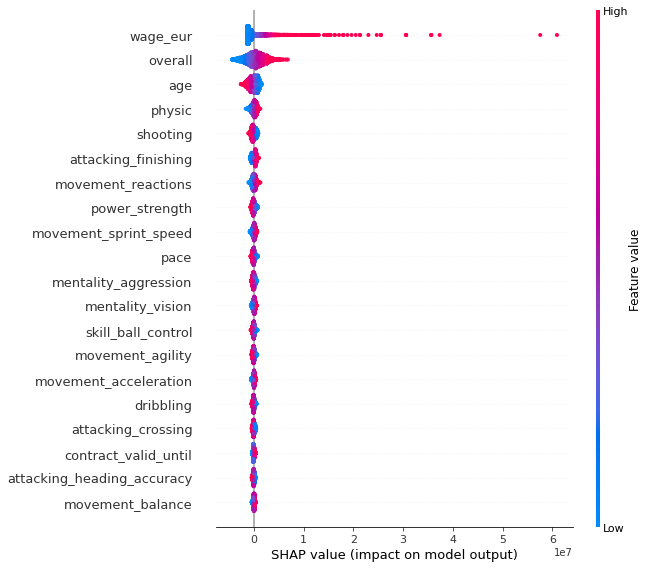

In [ ]:
explainer = shap.LinearExplainer(regrOutfield, x_test)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

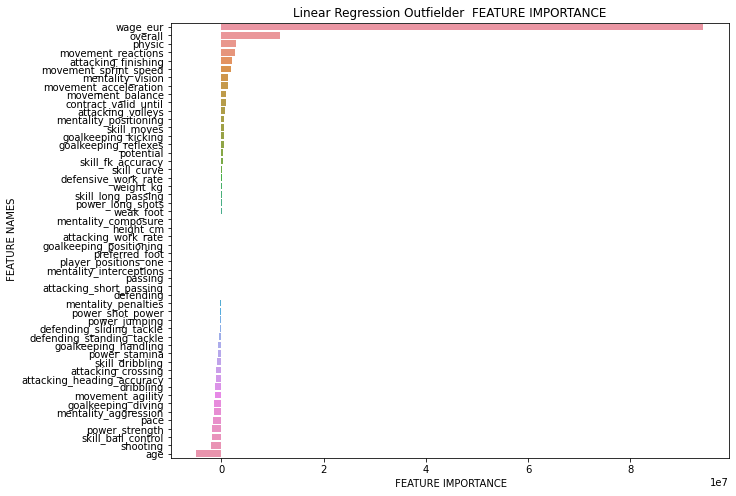

In [ ]:
plotFeatureImportanceAsGraph(x_train_features,linear_regression_importance,"Linear Regression Outfielder ")

Goalkeeper Dataset

In [ ]:
goalkeepers_dataframe.columns

Index(['preferred_foot', 'value_eur', 'age', 'height_cm', 'weight_kg',
       'overall', 'potential', 'wage_eur', 'weak_foot', 'contract_valid_until',
       'gk_speed', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes',
 

Running Linear Regression on the goalkeeper dataset


In [ ]:
train , test = train_test_split(goalkeepers_dataframe, test_size = 0.2)

x_train = train.drop('value_eur', axis=1)
y_train = train['value_eur']


x_test = test.drop('value_eur', axis = 1)
y_test = test['value_eur']

regrLRGoalkeeper = linear_model.LinearRegression()
regrLRGoalkeeper.fit(x_train, y_train)
y_pred = regrLRGoalkeeper.predict(x_test)

In [ ]:
EvaluativeMethods(y_test,y_pred)

(2315545.0509658135, 5361748883052.272, 1195066.4431032294, 0.8408588456050421)

In [ ]:
 linear_regression_importance = regrLRGoalkeeper.coef_

The feature importance of the columns in the goalkeepers dataframe

In [ ]:
x_train_features = (x_train.columns.values)
print(linear_regression_importance)

[-6.36431809e+04 -4.58800069e+06 -2.29264066e+06  5.54645278e+05
  2.78945073e+07 -6.79483342e+05  1.13889209e+08 -7.63647382e+05
  4.61554666e+04 -1.08984848e+07 -1.26996960e+04 -3.54632024e+06
  1.13514518e+06  6.66070661e+05  8.10916897e+05  1.73226286e+06
  1.77503527e+06 -1.34703131e+06 -7.84389166e+05 -1.17765585e+06
  6.05574079e+06  1.07802557e+07  1.00670811e+06 -3.52483529e+06
  3.14736582e+05 -1.84895877e+07 -3.74386809e+05  3.95745133e+05
  9.48452646e+05  1.54293494e+06 -7.00381971e+05 -5.82654743e+05
  1.18005334e+06  2.30281517e+05 -3.26038756e+06  8.98371566e+04
  5.28942191e+05  2.01503239e+06 -7.71057282e+06 -4.68661769e+06
  1.36215838e+07 -7.31324711e+06 -9.73128082e+06  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


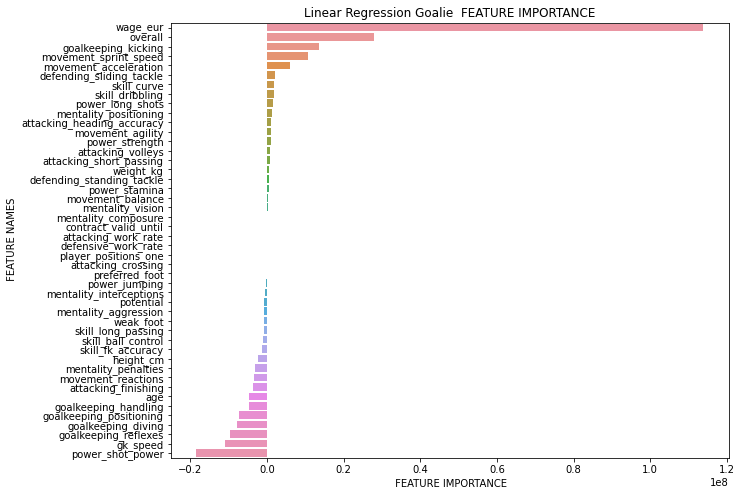

In [ ]:
plotFeatureImportanceAsGraph(x_train_features,linear_regression_importance,"Linear Regression Goalie ")

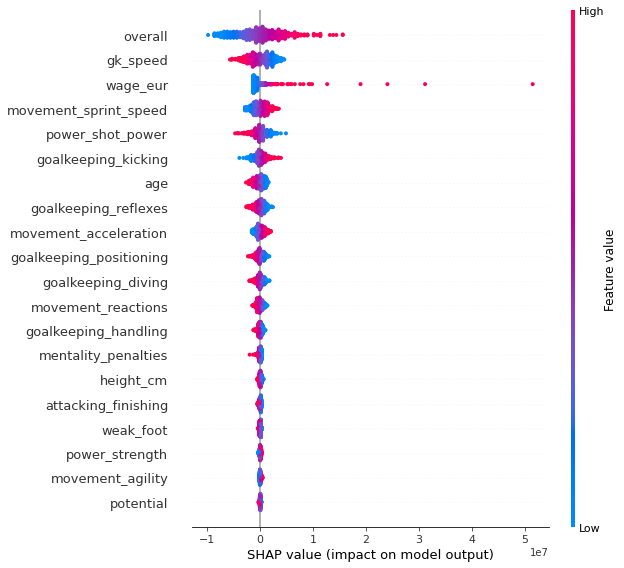

In [ ]:
explainer = shap.LinearExplainer(regrLRGoalkeeper, x_test)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

# Random Forest Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Random Forest Model Outfield Dataset

In [ ]:
train , test = train_test_split(outfield_dataframe,shuffle=True ,test_size = 0.2)

x_train = train.drop('value_eur', axis=1)
y_train = train['value_eur']


x_test = test.drop('value_eur', axis = 1)
y_test = test['value_eur']

regressorRFOutfield = RandomForestRegressor(n_estimators = 100, )
regressorRFOutfield.fit(x_train, y_train) 

modelScore = []
rmse_val = [] #store rmse vals in array for each run (k value)


In [ ]:
Y_pred = regressorRFOutfield.predict(x_test)
Y_pred

array([568250., 364500., 748500., ..., 750500., 135500., 638250.])

In [ ]:
EvaluativeMethods(y_test,Y_pred)

(727350.7996173461, 529039185703.9928, 92771.60012008405, 0.9814141798439757)

In [ ]:
random_forest_feature_importance = regressorRFOutfield.feature_importances_
x_train_features = (x_train.columns.values)
print(random_forest_feature_importance)

[5.97537417e-05 2.42351316e-02 1.41169228e-04 1.68294746e-04
 8.62873377e-01 8.95103651e-02 6.63271653e-04 1.73882699e-04
 2.26768288e-04 2.58127053e-04 3.09774285e-04 4.12073761e-04
 4.26959859e-04 1.58333672e-03 3.43528535e-04 1.90044230e-04
 3.02022606e-04 8.12119369e-04 3.45400389e-04 6.27030606e-04
 2.36116800e-04 2.16508255e-03 3.25331966e-04 2.73834951e-04
 4.88728784e-04 7.14925955e-04 6.11291869e-04 4.83379436e-04
 2.68798906e-04 6.42185238e-04 5.04441613e-04 4.36308455e-04
 3.80415789e-04 4.99281447e-04 3.45924704e-04 1.20685462e-03
 2.69841195e-04 2.86893420e-04 6.85171748e-04 3.81236188e-04
 5.73930096e-04 5.36467523e-04 3.63974863e-04 3.61282125e-04
 3.19547335e-04 5.00359337e-04 2.22891342e-04 3.13403850e-04
 2.37054965e-04 1.55338157e-04 8.00563450e-05 1.46721727e-03]


In [ ]:
# run = wandb.init(project='my-scikit-integration', name="regressionGraphsRFPlayer")
# wandb.sklearn.plot_regressor(regressor, x_train, x_test, y_train, y_test,  model_name='MLR')
# wandb.finish()

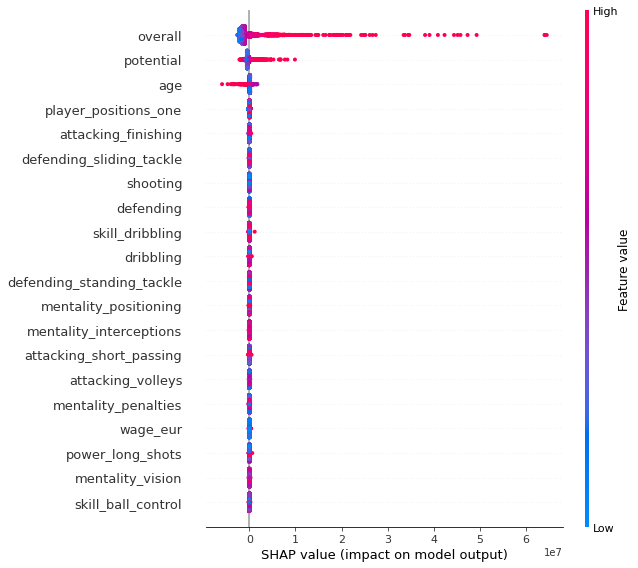

In [ ]:
explainer = shap.TreeExplainer(regressorRFOutfield)
shap.initjs()
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

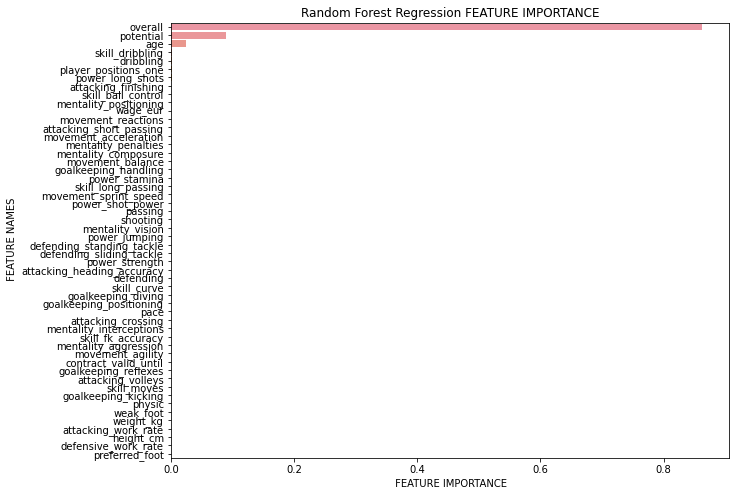

In [ ]:
plotFeatureImportanceAsGraph(x_train_features,random_forest_feature_importance,"Random Forest Regression")

**Random Forest Goalkeepers dataframe**

In [ ]:
train , test = train_test_split(goalkeepers_dataframe, test_size = 0.2)

x_train = train.drop('value_eur', axis=1)
y_train = train['value_eur']


x_test = test.drop('value_eur', axis = 1)
y_test = test['value_eur']

regressorRFGoalie = RandomForestRegressor(n_estimators = 100, )
regressorRFGoalie.fit(x_train, y_train) 

RandomForestRegressor()

In [ ]:
Y_pred = regressorRFGoalie.predict(x_test)
Y_pred

array([   49450.,  5516000.,    39750.,   522600.,    80150., 25790000.,
         437750.,   950750.,   153600.,   417850.,  1623000.,    91800.,
         331400.,   369000.,    49350.,  1575000.,   908500.,   146300.,
         169300.,   300250.,    49850.,    47450.,   468500.,    39050.,
         153800.,    95400.,    80350.,   536250., 18240000.,  8105000.,
        1101250.,   402100.,   278500.,   153000.,   447500.,   675500.,
        1897000.,  2040000.,    89000.,   308100.,   110800., 13895000.,
        1903000.,  3965000.,   946250.,   155200.,   977000.,    74650.,
         475000.,  1767000.,   425750.,   327500.,   659750.,    42950.,
        1037000.,  2644000.,    95700.,    56500.,  2161000.,   129500.,
        1255000.,   441000.,   399800.,   635000.,    80350.,  1555000.,
         287200.,   485500.,  5556000.,   695500.,   426750.,   833750.,
         580500.,   532000.,   290350.,   113600.,   321250.,   529000.,
        1869000.,   212200.,  9895000.,  3565000., 

In [ ]:
EvaluativeMethods(y_test,Y_pred)

(800045.8775584665, 640073406198.2969, 161166.54501216544, 0.9547150728043268)

Random Forest Features with regards to the x_train columns 

In [ ]:
random_forestGoalie_feature_importance = regressorRFGoalie.feature_importances_

In [ ]:
x_train_features = x_train.columns.tolist()

In [ ]:
# run = wandb.init(project='my-scikit-integration', name="regressionGraphsRFGoalie")
# wandb.sklearn.plot_regressor(regr, x_train, x_test, y_train, y_test,  model_name='RF')
# wandb.finish()

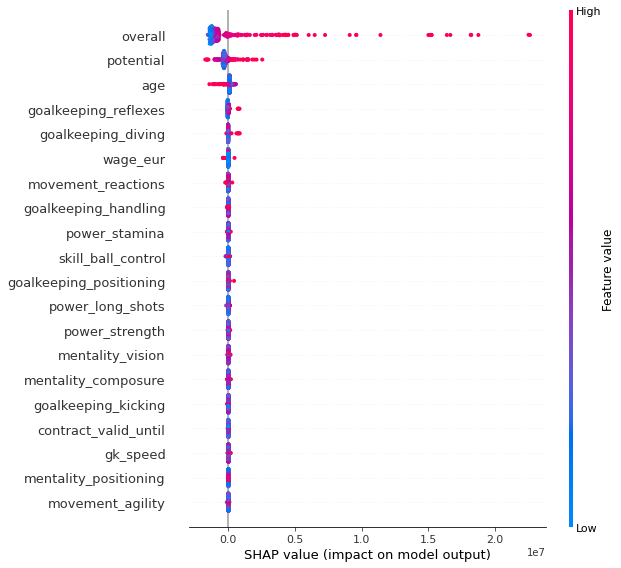

In [ ]:
explainer = shap.TreeExplainer(regressorRFGoalie)
shap.initjs()
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

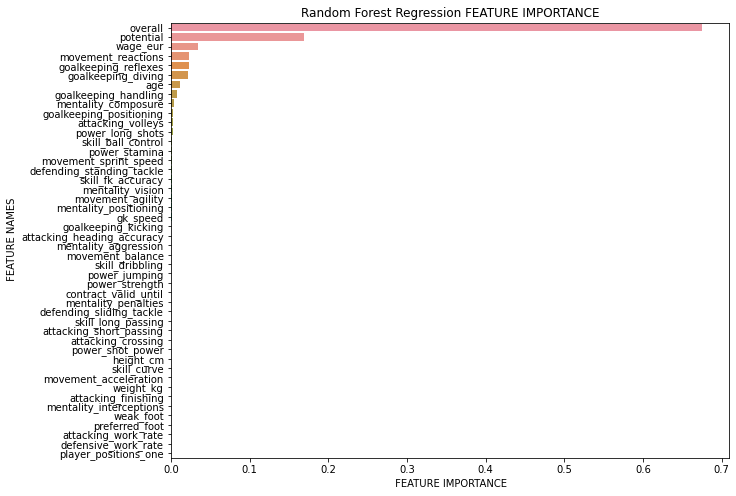

In [ ]:
plotFeatureImportanceAsGraph(regressorRFGoalie.feature_names_in_,regressorRFGoalie.feature_importances_,"Random Forest Regression")

# Decision Tree Regressor

Outfield Player Dataframe

In [ ]:
train , test = train_test_split(outfield_dataframe, test_size = 0.2)

x_train = train.drop('value_eur', axis=1)
y_train = train['value_eur']


x_test = test.drop('value_eur', axis = 1)
y_test = test['value_eur']

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
Y_pred = tree_reg.predict(x_test)

In [ ]:
EvaluativeMethods(y_test,Y_pred)

(840732.6087547672, 706831319423.5966, 127188.53197238066, 0.9731373612532335)

In [ ]:
importance = tree_reg.feature_importances_
tree_reg.feature_names = x_train.columns.tolist()

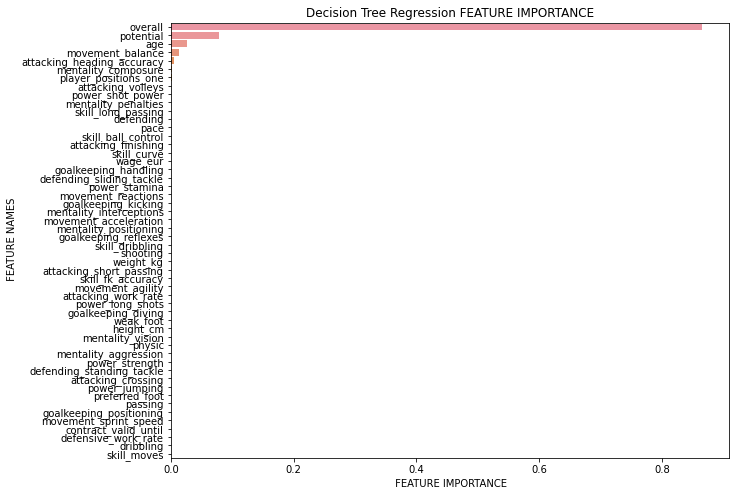

In [ ]:
plotFeatureImportanceAsGraph(tree_reg.feature_names,importance,"Decision Tree Regression")

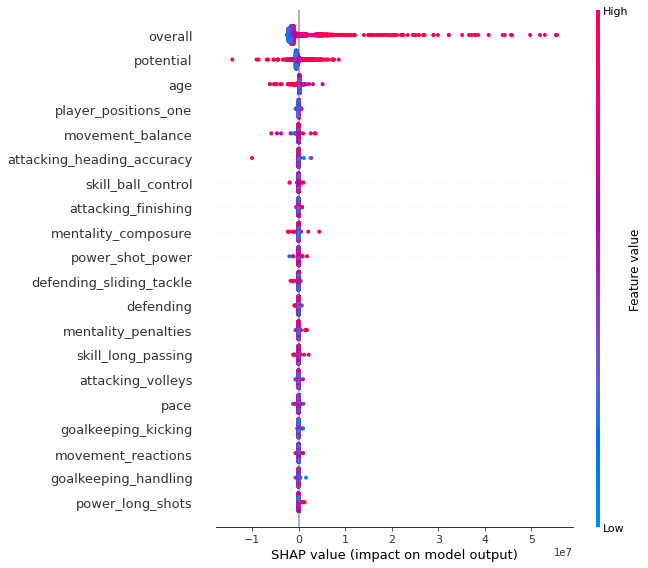

In [ ]:
explainer = shap.TreeExplainer(tree_reg)
shap.initjs()
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

Goalkeepers Dataframe


In [ ]:
train , test = train_test_split(goalkeepers_dataframe, test_size = 0.2)

x_train = train.drop('value_eur', axis=1)
y_train = train['value_eur']


x_test = test.drop('value_eur', axis = 1)
y_test = test['value_eur']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_regGoalie = DecisionTreeRegressor()
tree_regGoalie.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
Y_pred = tree_regGoalie.predict(x_test)

In [ ]:
EvaluativeMethods(y_test,Y_pred)

(1797264.7168091584, 3230160462287.1045, 300851.5815085158, 0.824475284147545)

Decision Tree Feature Importance

In [ ]:
importance = tree_regGoalie.feature_importances_

In [ ]:
tree_regGoalie.feature_names = x_train.columns.tolist()

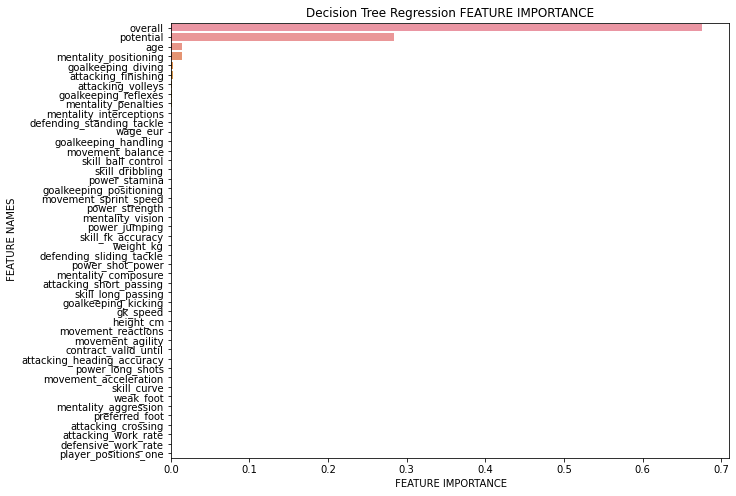

In [ ]:
plotFeatureImportanceAsGraph(tree_regGoalie.feature_names,importance,"Decision Tree Regression")

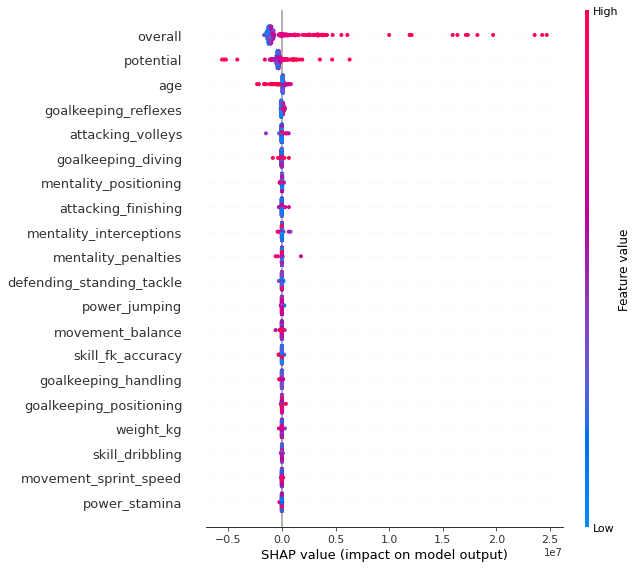

In [ ]:
explainer = shap.TreeExplainer(tree_regGoalie)
shap.initjs()
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

# Support Vector Machines Regression 

In [ ]:
from sklearn import svm
train , test = train_test_split(goalkeepers_dataframe, test_size = 0.2)

x_train = train.drop('value_eur', axis=1)
y_train = train['value_eur']


x_test = test.drop('value_eur', axis = 1)
y_test = test['value_eur']

regrSVRGoalie = svm.LinearSVR()
regrSVRGoalie.fit(x_train, y_train)

Y_pred = regrSVRGoalie.predict(x_test)

In [ ]:
x_train_features = x_train.columns

In [ ]:
EvaluativeMethods(y_test,Y_pred)

(5489657.926483179,
 30136344149799.605,
 1728846.2996213755,
 -0.1097404863079452)

In [ ]:
coefficient = regrSVRGoalie.coef_

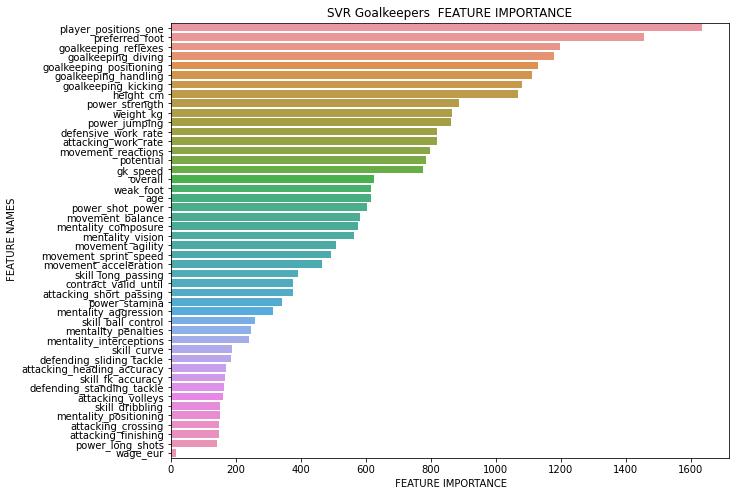

In [ ]:
plotFeatureImportanceAsGraph(x_train_features,coefficient,"SVR Goalkeepers ")

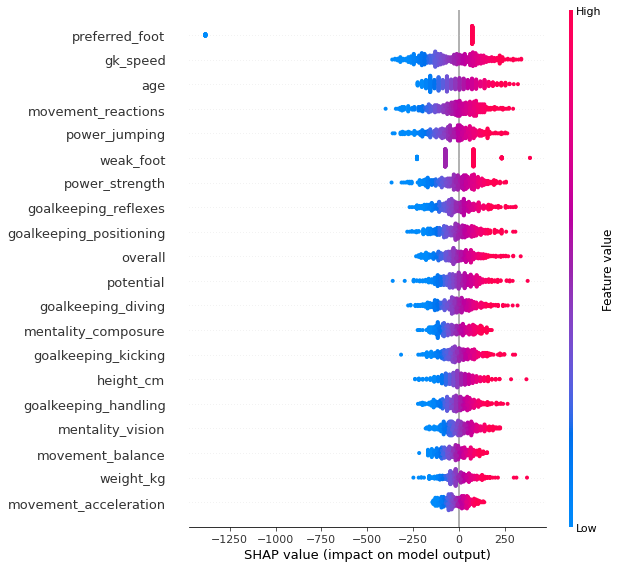

In [ ]:
explainer = shap.LinearExplainer(regrSVRGoalie, x_test)
shap.initjs()
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

Outfield players dataframe 

In [ ]:
from sklearn import svm
train , test = train_test_split(outfield_dataframe, test_size = 0.2)

x_train = train.drop('value_eur', axis=1)
y_train = train['value_eur']


x_test = test.drop('value_eur', axis = 1)
y_test = test['value_eur']

regrOutfieldSVR = svm.LinearSVR()
regrOutfieldSVR.fit(x_train, y_train)

Y_pred = regrOutfieldSVR.predict(x_test)

In [ ]:
EvaluativeMethods(y_test,Y_pred)

(5922144.858263687, 35071799722259.03, 2144546.2083208053, -0.1273333051623864)

In [ ]:
r2_score(y_test,Y_pred)

-0.1273333051623864

In [ ]:
x_train_featuresOutfield = x_train.columns

In [ ]:
coefficient = regrOutfieldSVR.coef_

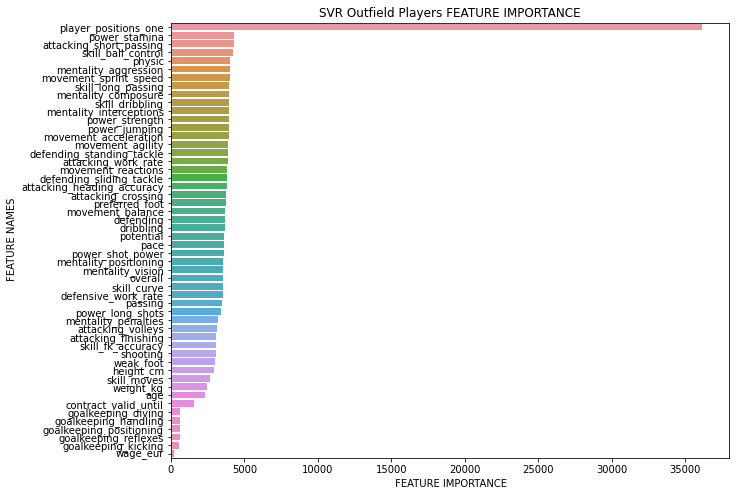

In [ ]:
plotFeatureImportanceAsGraph(x_train_featuresOutfield,coefficient,"SVR Outfield Players")

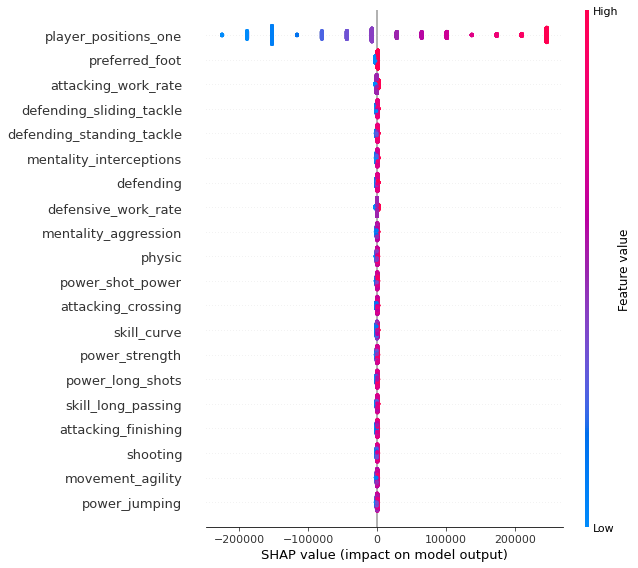

In [ ]:
explainer = shap.LinearExplainer(regrOutfieldSVR, x_test)
shap.initjs()
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

XGRegressor Outfield

In [ ]:
train , test = train_test_split(outfield_dataframe, test_size = 0.2)

x_train = train.drop('value_eur', axis=1)
y_train = train['value_eur']


x_test = test.drop('value_eur', axis = 1)
y_test = test['value_eur']

xgbrOutfield = XGBRegressor(n_estimators=1000,learning_rate=0.1)

In [ ]:
xgbr_modelOutfield = xgbrOutfield.fit(x_train, y_train)

[14:00:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
estOutfield = xgbr_modelOutfield.predict(x_test)

In [ ]:
EvaluativeMethods(y_test,estOutfield)

(425264.5914284039, 180849972722.7673, 89444.57406952445, 0.9931612279909267)

100%|===================| 3315/3331 [00:23<00:00]       

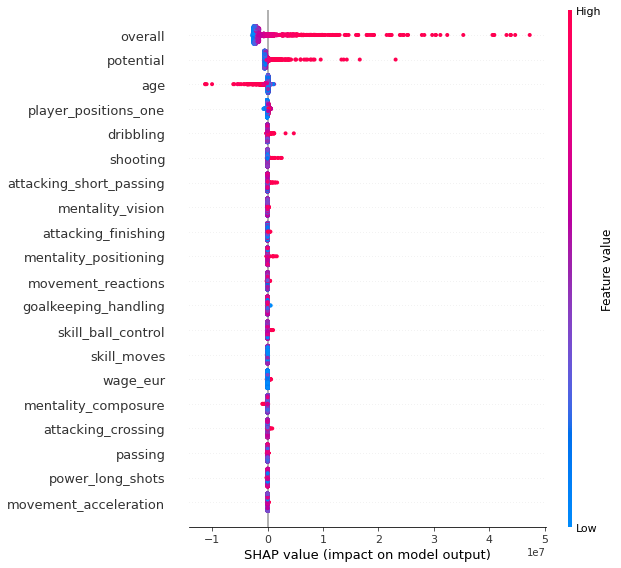

In [ ]:
explainer = shap.TreeExplainer(xgbr_modelOutfield, x_test)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

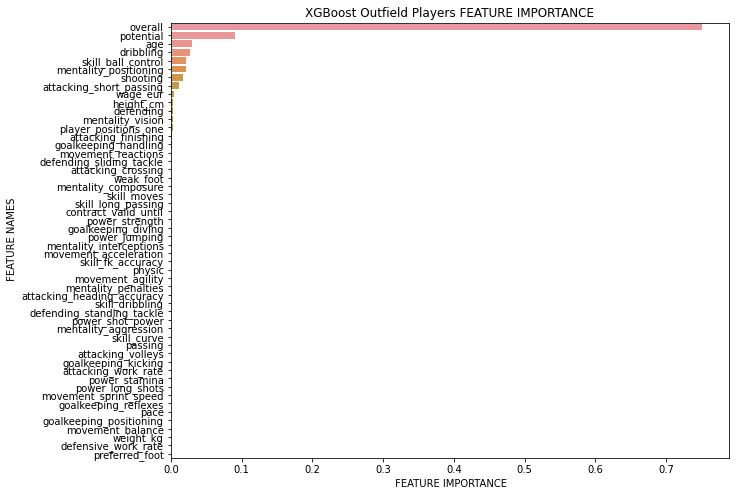

In [ ]:
plotFeatureImportanceAsGraph(x_train.columns,xgbr_modelOutfield.feature_importances_,"XGBoost Outfield Players")

XGRegressor Goalie

In [ ]:
train , test = train_test_split(goalkeepers_dataframe,shuffle = True, test_size = 0.2)

x_train = train.drop('value_eur', axis=1)
y_train = train['value_eur']


x_test = test.drop('value_eur', axis = 1)
y_test = test['value_eur']

xgbr = XGBRegressor(n_estimators=1000,learning_rate=0.1)

In [ ]:
xgbr_modelGK = xgbr.fit(x_train, y_train)

[00:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
estGK = xgbr_modelGK.predict(x_test)

In [ ]:
EvaluativeMethods(y_test,estGK)

(463007.5703244497, 214376010177.7502, 127826.44811061292, 0.9831350476435088)

In [ ]:
xgbrGoalkeeperCols = x_train.columns

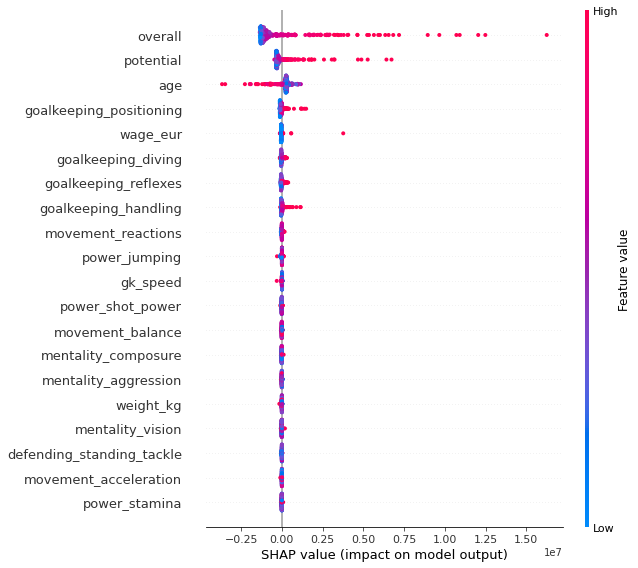

In [ ]:
explainer = shap.TreeExplainer(xgbr_modelGK, x_test)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

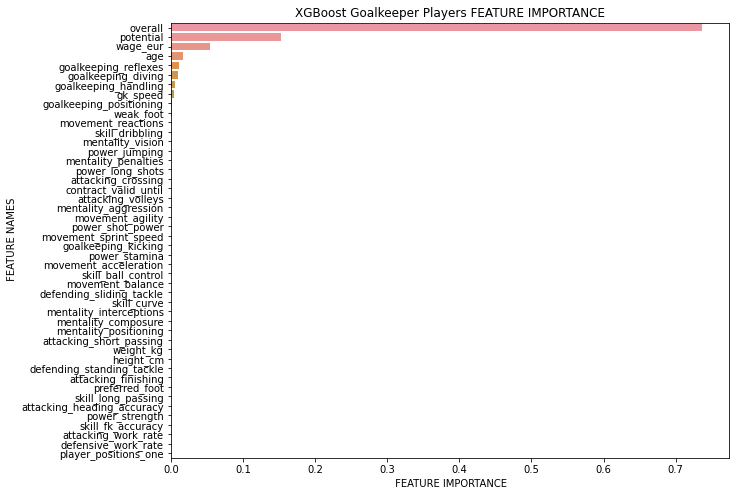

In [ ]:
plotFeatureImportanceAsGraph(xgbrGoalkeeperCols,xgbr_modelGK.feature_importances_,"XGBoost Goalkeeper Players")